# Credit Card Fraud Detection Analysis
**Introduction**
The Finance Challenge, a real-world based scenario requiring adept data analysis to confront a formidable adversary within the financial domain: credit card fraud. In this challenge, we will delve into the complexities of fraud detection and prevention, equipped with data-driven insights, advanced analytics, and a touch of inventive thinking.
 That dataset is containing information on credit card transactions, including transaction details, merchant information, and customer demographics. This is Parque file and it's size 217.8 MB.

# Access and Gathering data:
Data is provided from DS 4 platform. It's a big data file which is in parquet format. Reading that large file need pyarrow. Installed pyarrow by pip. File read into table, then converted into pandas. File size is (6877837, 63)

#Assess
Zipcode format
Duplicat columns with different name for example month, day, year, and date, rooling_count and rolling volume have the same values
Renaming columns
Dropped unnecessary columns
Removed duplicates

# Data Cleaning:
Removed unneccessar columns. there are many date and time informaions columns, so deleting datetime column, merchant_name is all in int, there is no name in it, dropping that column as well
Columns with Null values:
merchant_name
apartment
rolling_change_off
missing_froud_count
rolling_tran_count
rolling_tran_volume
transaction_count
Renaming columns

In [1]:
from google.colab import drive
drive.mount('/content/mydrive')

Mounted at /content/mydrive


Installing necessary libraries to read Parquet file.

In [2]:
#pip install pyarrow

In [3]:
#pip install fastparquet

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pyarrow.parquet as pq
from sklearn.linear_model import LogisticRegression
#import fastparquet as fp

In [5]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder

In [6]:
# Specify the path to your binary Parquet file
file_path = '/content/mydrive/MyDrive/credit_card_data_da.parquet'

# Read the binary Parquet file
table = pq.read_table('/content/mydrive/MyDrive/credit_card_data_da.parquet')

# Convert the table to a Pandas DataFrame
df_credit = table.to_pandas()
df_credit.head()

,User,Card,Year,Month,Day,Time,Amount,Use Chip,Merchant Name,Merchant City,...,Acct Open Date,Year PIN last Changed,Card on Dark Web,level_2,rolling_charge_off,rolling_fraud_count,rolling_tran_count,rolling_tran_volume,transaction_count,years_since_pin_change
0,0,0,2016,1,3,10:48,66.48,Chip Transaction,-3345936507911876459,La Verne,...,09/2002,2008,No,0,NaN,NaN,NaN,NaN,NaN,8
1,0,0,2016,1,4,06:43,40.02,Chip Transaction,-34551508091458520,La Verne,...,09/2002,2008,No,1,0.0,0.0,66.48,66.48,1.0,8
2,0,0,2016,1,7,09:30,54.11,Chip Transaction,4055257078481058705,La Verne,...,09/2002,2008,No,2,0.0,0.0,106.50,106.50,2.0,8
3,0,0,2016,1,7,16:03,89.48,Chip Transaction,3414527459579106770,Monterey Park,...,09/2002,2008,No,2,0.0,0.0,106.50,106.50,2.0,8
4,0,0,2016,1,10,06:38,29.15,Chip Transaction,-5475680618560174533,Monterey Park,...,09/2002,2008,No,3,0.0,0.0,250.09,250.09,4.0,8


In [7]:
pd.set_option('display.max_columns', 63)

In [8]:
#Replacing spaces from '_'
df_credit.columns = df_credit.columns.str.replace(' ', '_')

In [9]:

df_credit.columns

Index(['User', 'Card', 'Year', 'Month', 'Day', 'Time', 'Amount', 'Use_Chip',
       'Merchant_Name', 'Merchant_City', 'Merchant_State', 'Zip', 'MCC',
       'Errors?', 'Is_Fraud?', 'hour', 'minute', 'date', 'datetime',
       'time_of_day', 'target', 'charge_off', 'merchant_city_rome', 'Person',
       'Current_Age', 'Retirement_Age', 'Birth_Year', 'Birth_Month', 'Gender',
       'Address', 'Apartment', 'City', 'State', 'Zipcode', 'Latitude',
       'Longitude', 'Per_Capita_Income_-_Zipcode', 'Yearly_Income_-_Person',
       'Total_Debt', 'FICO_Score', 'Num_Credit_Cards',
       'personal_to_zipcode_income_diff', 'total_debt_personal_income_ratio',
       'total_debt_cards_ratio', 'CARD_INDEX', 'Card_Brand', 'Card_Type',
       'Card_Number', 'Expires', 'CVV', 'Has_Chip', 'Cards_Issued',
       'Credit_Limit', 'Acct_Open_Date', 'Year_PIN_last_Changed',
       'Card_on_Dark_Web', 'level_2', 'rolling_charge_off',
       'rolling_fraud_count', 'rolling_tran_count', 'rolling_tran_volume',


In [10]:
#Coverting columns in lower case
df_credit.columns = df_credit.columns.str.lower()


In [11]:
df_credit.tail(20)

,user,card,year,month,day,time,amount,use_chip,merchant_name,merchant_city,merchant_state,zip,mcc,errors?,is_fraud?,hour,minute,date,datetime,time_of_day,target,charge_off,merchant_city_rome,person,current_age,retirement_age,birth_year,birth_month,gender,address,apartment,city,state,zipcode,latitude,longitude,per_capita_income_-_zipcode,yearly_income_-_person,total_debt,fico_score,num_credit_cards,personal_to_zipcode_income_diff,total_debt_personal_income_ratio,total_debt_cards_ratio,card_index,card_brand,card_type,card_number,expires,cvv,has_chip,cards_issued,credit_limit,acct_open_date,year_pin_last_changed,card_on_dark_web,level_2,rolling_charge_off,rolling_fraud_count,rolling_tran_count,rolling_tran_volume,transaction_count,years_since_pin_change
6877817,1999,1,2019,12,27,08:20,45.97,Online Transaction,-6160036380778658394,ONLINE,None,NaN,4121,None,No,08,20,2019-12-27,2019-12-27 08:20:00,morning hours,0,0.0,False,Kenia Harris,21,60,1998,11,Female,472 Ocean View Street,NaN,Merrimack,NH,3054,42.86,-71.48,32325.0,65909.0,181261.0,673,2,33584.0,2.750171,90630.5,1,Visa,Credit,4994011318343994,12/2020,120,YES,1,14400.0,05/2017,2017,No,3376889,0.0,0.0,9307.30,9307.30,159.0,2
6877818,1999,1,2019,12,27,09:04,140.00,Chip Transaction,-4282466774399734331,Berlin,NH,3570.0,4829,None,No,09,04,2019-12-27,2019-12-27 09:04:00,morning hours,0,0.0,False,Kenia Harris,21,60,1998,11,Female,472 Ocean View Street,NaN,Merrimack,NH,3054,42.86,-71.48,32325.0,65909.0,181261.0,673,2,33584.0,2.750171,90630.5,1,Visa,Credit,4994011318343994,12/2020,120,YES,1,14400.0,05/2017,2017,No,3376889,0.0,0.0,9307.30,9307.30,159.0,2
6877819,1999,1,2019,12,27,20:14,48.77,Chip Transaction,2500998799892805156,Merrimack,NH,3054.0,4121,None,No,20,14,2019-12-27,2019-12-27 20:14:00,off hours,0,0.0,False,Kenia Harris,21,60,1998,11,Female,472 Ocean View Street,NaN,Merrimack,NH,3054,42.86,-71.48,32325.0,65909.0,181261.0,673,2,33584.0,2.750171,90630.5,1,Visa,Credit,4994011318343994,12/2020,120,YES,1,14400.0,05/2017,2017,No,3376889,0.0,0.0,9307.30,9307.30,159.0,2
6877820,1999,1,2019,12,27,20:35,29.43,Online Transaction,-6160036380778658394,ONLINE,None,NaN,4121,None,No,20,35,2019-12-27,2019-12-27 20:35:00,off hours,0,0.0,False,Kenia Harris,21,60,1998,11,Female,472 Ocean View Street,NaN,Merrimack,NH,3054,42.86,-71.48,32325.0,65909.0,181261.0,673,2,33584.0,2.750171,90630.5,1,Visa,Credit,4994011318343994,12/2020,120,YES,1,14400.0,05/2017,2017,No,3376889,0.0,0.0,9307.30,9307.30,159.0,2
6877821,1999,1,2019,12,28,00:34,232.68,Online Transaction,4241336128694185533,ONLINE,None,NaN,4814,None,No,00,34,2019-12-28,2019-12-28 00:34:00,off hours,0,0.0,False,Kenia Harris,21,60,1998,11,Female,472 Ocean View Street,NaN,Merrimack,NH,3054,42.86,-71.48,32325.0,65909.0,181261.0,673,2,33584.0,2.750171,90630.5,1,Visa,Credit,4994011318343994,12/2020,120,YES,1,14400.0,05/2017,2017,No,3376890,0.0,0.0,9349.21,9349.21,157.0,2
6877822,1999,1,2019,12,28,07:52,42.39,Online Transaction,-5841929396161652653,ONLINE,None,NaN,4121,None,No,07,52,2019-12-28,2019-12-28 07:52:00,morning hours,0,0.0,False,Kenia Harris,21,60,1998,11,Female,472 Ocean View Street,NaN,Merrimack,NH,3054,42.86,-71.48,32325.0,65909.0,181261.0,673,2,33584.0,2.750171,90630.5,1,Visa,Credit,4994011318343994,12/2020,120,YES,1,14400.0,05/2017,2017,No,3376890,0.0,0.0,9349.21,9349.21,157.0,2
6877823,1999,1,2019,12,28,11:55,80.58,Chip Transaction,-5987150210898037557,Merrimack,NH,3054.0,7538,None,No,11,55,2019-12-28,2019-12-28 11:55:00,day hours,0,0.0,False,Kenia Harris,21,60,1998,11,Female,472 Ocean View Street,NaN,Merrimack,NH,3054,42.86,-71.48,32325.0,65909.0,181261.0,673,2,33584.0,2.750171,90630.5,1,Visa,Credit,4994011318343994,12/2020,120,YES,1,14400.0,05/2017,2017,No,3376890,0.0,0.0,9349.21,9349.21,157.0,2
6877824,1999,1,2019,12,28,15:07,8.15,Chip Transaction,1641456720718814353,Merrimack,NH,3054.0,5411,None,No,15,07,2019-12-28,2019-12-28 15:07:00,day hours,0,0.0,False,Kenia Harris,21,60,1998,11,Female,472 Ocean View Street,NaN,Merrimack,NH,305

In [12]:
rows_with_null = df_credit[df_credit.isna().any(axis=1)]
rows_with_null

,user,card,year,month,day,time,amount,use_chip,merchant_name,merchant_city,merchant_state,zip,mcc,errors?,is_fraud?,hour,minute,date,datetime,time_of_day,target,charge_off,merchant_city_rome,person,current_age,retirement_age,birth_year,birth_month,gender,address,apartment,city,state,zipcode,latitude,longitude,per_capita_income_-_zipcode,yearly_income_-_person,total_debt,fico_score,num_credit_cards,personal_to_zipcode_income_diff,total_debt_personal_income_ratio,total_debt_cards_ratio,card_index,card_brand,card_type,card_number,expires,cvv,has_chip,cards_issued,credit_limit,acct_open_date,year_pin_last_changed,card_on_dark_web,level_2,rolling_charge_off,rolling_fraud_count,rolling_tran_count,rolling_tran_volume,transaction_count,years_since_pin_change
0,0,0,2016,1,3,10:48,66.48,Chip Transaction,-3345936507911876459,La Verne,CA,91750.0,7538,None,No,10,48,2016-01-03,2016-01-03 10:48:00,day hours,0,0.0,False,Hazel Robinson,53,66,1966,11,Female,462 Rose Lane,NaN,La Verne,CA,91750,34.15,-117.76,29278.0,59696.0,127613.0,787,5,30418.0,2.137714,25522.6,0,Visa,Debit,4344676511950444,12/2022,623,YES,2,24295.0,09/2002,2008,No,0,NaN,NaN,NaN,NaN,NaN,8
1,0,0,2016,1,4,06:43,40.02,Chip Transaction,-34551508091458520,La Verne,CA,91750.0,5912,None,No,06,43,2016-01-04,2016-01-04 06:43:00,morning hours,0,0.0,False,Hazel Robinson,53,66,1966,11,Female,462 Rose Lane,NaN,La Verne,CA,91750,34.15,-117.76,29278.0,59696.0,127613.0,787,5,30418.0,2.137714,25522.6,0,Visa,Debit,4344676511950444,12/2022,623,YES,2,24295.0,09/2002,2008,No,1,0.0,0.0,66.48,66.48,1.0,8
2,0,0,2016,1,7,09:30,54.11,Chip Transaction,4055257078481058705,La Verne,CA,91750.0,7538,None,No,09,30,2016-01-07,2016-01-07 09:30:00,morning hours,0,0.0,False,Hazel Robinson,53,66,1966,11,Female,462 Rose Lane,NaN,La Verne,CA,91750,34.15,-117.76,29278.0,59696.0,127613.0,787,5,30418.0,2.137714,25522.6,0,Visa,Debit,4344676511950444,12/2022,623,YES,2,24295.0,09/2002,2008,No,2,0.0,0.0,106.50,106.50,2.0,8
3,0,0,2016,1,7,16:03,89.48,Chip Transaction,3414527459579106770,Monterey Park,CA,91754.0,5651,None,No,16,03,2016-01-07,2016-01-07 16:03:00,day hours,0,0.0,False,Hazel Robinson,53,66,1966,11,Female,462 Rose Lane,NaN,La Verne,CA,91750,34.15,-117.76,29278.0,59696.0,127613.0,787,5,30418.0,2.137714,25522.6,0,Visa,Debit,4344676511950444,12/2022,623,YES,2,24295.0,09/2002,2008,No,2,0.0,0.0,106.50,106.50,2.0,8
4,0,0,2016,1,10,06:38,29.15,Chip Transaction,-5475680618560174533,Monterey Park,CA,91755.0,5942,None,No,06,38,2016-01-10,2016-01-10 06:38:00,morning hours,0,0.0,False,Hazel Robinson,53,66,1966,11,Female,462 Rose Lane,NaN,La Verne,CA,91750,34.15,-117.76,29278.0,59696.0,127613.0,787,5,30418.0,2.137714,25522.6,0,Visa,Debit,4344676511950444,12/2022,623,YES,2,24295.0,09/2002,2008,No,3,0.0,0.0,250.09,250.09,4.0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6877832,1999,1,2019,12,30,11:38,66.53,Chip Transaction,2910328604019547969,Milford,NH,3055.0,7538,None,No,11,38,2019-12-30,2019-12-30 11:38:00,day hours,0,0.0,False,Kenia Harris,21,60,1998,11,Female,472 Ocean View Street,NaN,Merrimack,NH,3054,42.86,-71.48,32325.0,65909.0,181261.0,673,2,33584.0,2.750171,90630.5,1,Visa,Credit,4994011318343994,12/2020,120,YES,1,14400.0,05/2017,2017,No,3376892,0.0,0.0,9607.94,9607.94,161.0,2
6877833,1999,1,2019,12,30,12:03,99.67,Chip Transaction,1641456720718814353,Merrimack,NH,3054.0,5411,None,No,12,03,2019-12-30,2019-12-30 12:03:00,day hours,0,0.0,False,Kenia Harris,21,60,1998,11,Female,472 Ocean View Street,NaN,Merrimack,NH,3054,42.86,-71.48,32325.0,65909.0,181261.0,673,2,33584.0,2.750171,90630.5,1,Visa,Credit,4994011318343994,12/2020,120,YES,1,14400.0,05/2017,2017,No,3376892,0.0,0.0,9607.94,9607.94,161.0,2
6877834,1999,1,2019,12,30,18:44,93.63,Chip Transaction,-5501892381419303127,Merrimack,NH,3054.0,5651,None,No,18,44,

In [13]:
rows_with_null.shape

(6852432, 63)

In [14]:
df_credit.shape

(6877837, 63)

In [15]:
df_credit[df_credit['target'] == 0]

,user,card,year,month,day,time,amount,use_chip,merchant_name,merchant_city,merchant_state,zip,mcc,errors?,is_fraud?,hour,minute,date,datetime,time_of_day,target,charge_off,merchant_city_rome,person,current_age,retirement_age,birth_year,birth_month,gender,address,apartment,city,state,zipcode,latitude,longitude,per_capita_income_-_zipcode,yearly_income_-_person,total_debt,fico_score,num_credit_cards,personal_to_zipcode_income_diff,total_debt_personal_income_ratio,total_debt_cards_ratio,card_index,card_brand,card_type,card_number,expires,cvv,has_chip,cards_issued,credit_limit,acct_open_date,year_pin_last_changed,card_on_dark_web,level_2,rolling_charge_off,rolling_fraud_count,rolling_tran_count,rolling_tran_volume,transaction_count,years_since_pin_change
0,0,0,2016,1,3,10:48,66.48,Chip Transaction,-3345936507911876459,La Verne,CA,91750.0,7538,None,No,10,48,2016-01-03,2016-01-03 10:48:00,day hours,0,0.0,False,Hazel Robinson,53,66,1966,11,Female,462 Rose Lane,NaN,La Verne,CA,91750,34.15,-117.76,29278.0,59696.0,127613.0,787,5,30418.0,2.137714,25522.6,0,Visa,Debit,4344676511950444,12/2022,623,YES,2,24295.0,09/2002,2008,No,0,NaN,NaN,NaN,NaN,NaN,8
1,0,0,2016,1,4,06:43,40.02,Chip Transaction,-34551508091458520,La Verne,CA,91750.0,5912,None,No,06,43,2016-01-04,2016-01-04 06:43:00,morning hours,0,0.0,False,Hazel Robinson,53,66,1966,11,Female,462 Rose Lane,NaN,La Verne,CA,91750,34.15,-117.76,29278.0,59696.0,127613.0,787,5,30418.0,2.137714,25522.6,0,Visa,Debit,4344676511950444,12/2022,623,YES,2,24295.0,09/2002,2008,No,1,0.0,0.0,66.48,66.48,1.0,8
2,0,0,2016,1,7,09:30,54.11,Chip Transaction,4055257078481058705,La Verne,CA,91750.0,7538,None,No,09,30,2016-01-07,2016-01-07 09:30:00,morning hours,0,0.0,False,Hazel Robinson,53,66,1966,11,Female,462 Rose Lane,NaN,La Verne,CA,91750,34.15,-117.76,29278.0,59696.0,127613.0,787,5,30418.0,2.137714,25522.6,0,Visa,Debit,4344676511950444,12/2022,623,YES,2,24295.0,09/2002,2008,No,2,0.0,0.0,106.50,106.50,2.0,8
3,0,0,2016,1,7,16:03,89.48,Chip Transaction,3414527459579106770,Monterey Park,CA,91754.0,5651,None,No,16,03,2016-01-07,2016-01-07 16:03:00,day hours,0,0.0,False,Hazel Robinson,53,66,1966,11,Female,462 Rose Lane,NaN,La Verne,CA,91750,34.15,-117.76,29278.0,59696.0,127613.0,787,5,30418.0,2.137714,25522.6,0,Visa,Debit,4344676511950444,12/2022,623,YES,2,24295.0,09/2002,2008,No,2,0.0,0.0,106.50,106.50,2.0,8
4,0,0,2016,1,10,06:38,29.15,Chip Transaction,-5475680618560174533,Monterey Park,CA,91755.0,5942,None,No,06,38,2016-01-10,2016-01-10 06:38:00,morning hours,0,0.0,False,Hazel Robinson,53,66,1966,11,Female,462 Rose Lane,NaN,La Verne,CA,91750,34.15,-117.76,29278.0,59696.0,127613.0,787,5,30418.0,2.137714,25522.6,0,Visa,Debit,4344676511950444,12/2022,623,YES,2,24295.0,09/2002,2008,No,3,0.0,0.0,250.09,250.09,4.0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6877832,1999,1,2019,12,30,11:38,66.53,Chip Transaction,2910328604019547969,Milford,NH,3055.0,7538,None,No,11,38,2019-12-30,2019-12-30 11:38:00,day hours,0,0.0,False,Kenia Harris,21,60,1998,11,Female,472 Ocean View Street,NaN,Merrimack,NH,3054,42.86,-71.48,32325.0,65909.0,181261.0,673,2,33584.0,2.750171,90630.5,1,Visa,Credit,4994011318343994,12/2020,120,YES,1,14400.0,05/2017,2017,No,3376892,0.0,0.0,9607.94,9607.94,161.0,2
6877833,1999,1,2019,12,30,12:03,99.67,Chip Transaction,1641456720718814353,Merrimack,NH,3054.0,5411,None,No,12,03,2019-12-30,2019-12-30 12:03:00,day hours,0,0.0,False,Kenia Harris,21,60,1998,11,Female,472 Ocean View Street,NaN,Merrimack,NH,3054,42.86,-71.48,32325.0,65909.0,181261.0,673,2,33584.0,2.750171,90630.5,1,Visa,Credit,4994011318343994,12/2020,120,YES,1,14400.0,05/2017,2017,No,3376892,0.0,0.0,9607.94,9607.94,161.0,2
6877834,1999,1,2019,12,30,18:44,93.63,Chip Transaction,-5501892381419303127,Merrimack,NH,3054.0,5651,None,No,18,44,

In [16]:
df_credit.rolling_fraud_count.value_counts()

0.0     6793845
3.0       16013
2.0       12827
1.0       10947
4.0       10117
5.0        6081
6.0        4154
7.0        4054
8.0        2863
9.0        2697
10.0       1583
11.0       1284
12.0       1070
13.0        696
14.0        430
15.0        384
16.0        123
18.0         88
17.0         58
20.0         40
19.0         14
Name: rolling_fraud_count, dtype: int64

In [17]:
df_credit.rolling_charge_off.value_counts()

 0.00      6793854
 132.31        227
 734.42        217
 313.34        192
 954.45        182
            ...   
-264.97          1
 42.48           1
 630.64          1
 676.10          1
 730.41          1
Name: rolling_charge_off, Length: 6356, dtype: int64

In [18]:
df_credit.card_index.value_counts()

0    2588338
1    1798429
2    1242107
3     740142
4     317952
5     130945
6      47235
7      11897
8        792
Name: card_index, dtype: int64

In [19]:
df_credit.target.value_counts(), df_credit['is_fraud?'].value_counts()

(0    6869425
 1       8412
 Name: target, dtype: int64,
 No     6869425
 Yes       8412
 Name: is_fraud?, dtype: int64)

Is_fraud? and target columns are the same, 0 means no fraud, and 1 means fraud.

<Axes: >

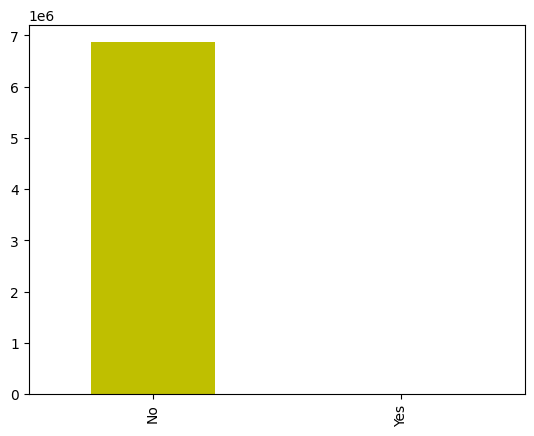

In [20]:
df_credit['is_fraud?'].value_counts().plot(kind = 'bar', color = 'y')

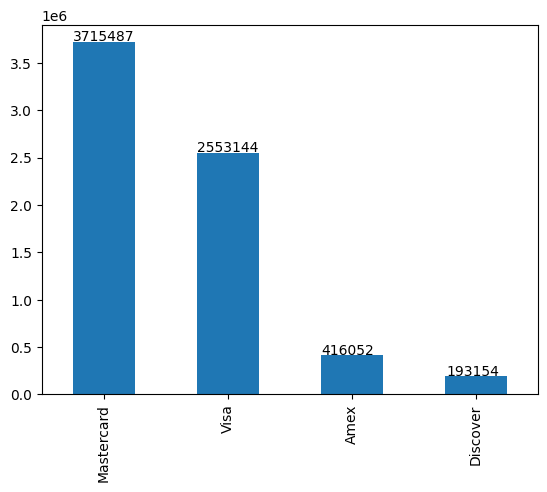

In [21]:
ax = df_credit.card_brand.value_counts().plot(kind = 'bar')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))


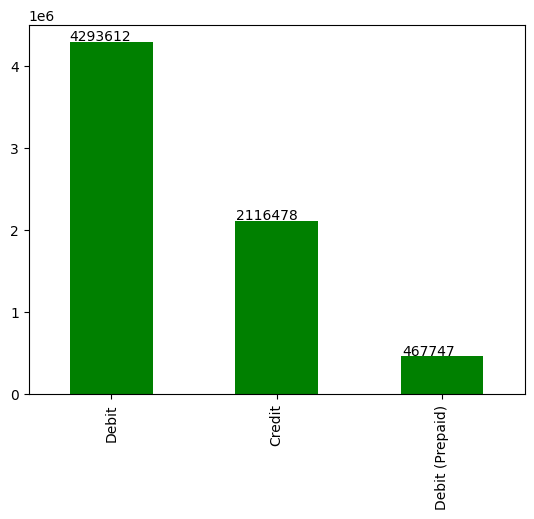

In [22]:
ax2  = df_credit.card_type.value_counts().plot(kind = 'bar', color = 'g')
for p in ax2.patches:
  ax2.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))


In [23]:
df_credit.apartment

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
           ..
6877832   NaN
6877833   NaN
6877834   NaN
6877835   NaN
6877836   NaN
Name: apartment, Length: 6877837, dtype: float64

In [24]:
df_credit.merchant_name.value_counts

<bound method IndexOpsMixin.value_counts of 0         -3345936507911876459
1           -34551508091458520
2          4055257078481058705
3          3414527459579106770
4         -5475680618560174533
                  ...         
6877832    2910328604019547969
6877833    1641456720718814353
6877834   -5501892381419303127
6877835   -6160036380778658394
6877836    2500998799892805156
Name: merchant_name, Length: 6877837, dtype: int64>

In [25]:
df_credit.merchant_city

0               La Verne
1               La Verne
2               La Verne
3          Monterey Park
4          Monterey Park
               ...      
6877832          Milford
6877833        Merrimack
6877834        Merrimack
6877835           ONLINE
6877836        Merrimack
Name: merchant_city, Length: 6877837, dtype: object

In [26]:
df_credit['errors?'].value_counts()

Insufficient Balance                     66878
Bad PIN                                  16420
Technical Glitch                         13692
Bad Card Number                           4295
Bad CVV                                   3370
Bad Expiration                            3354
Bad Zipcode                                582
Bad PIN,Insufficient Balance               156
Insufficient Balance,Technical Glitch      119
Bad PIN,Technical Glitch                    38
Bad Card Number,Insufficient Balance        36
Bad CVV,Insufficient Balance                27
Bad Card Number,Bad CVV                     23
Bad Expiration,Insufficient Balance         21
Bad Card Number,Bad Expiration              18
Bad Expiration,Bad CVV                      17
Bad Expiration,Technical Glitch             10
Bad Card Number,Technical Glitch             5
Bad CVV,Technical Glitch                     4
Bad Zipcode,Insufficient Balance             3
Bad Zipcode,Technical Glitch                 1
Name: errors?

In [27]:
df_credit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6877837 entries, 0 to 6877836
Data columns (total 63 columns):
 #   Column                            Dtype         
---  ------                            -----         
 0   user                              int64         
 1   card                              int64         
 2   year                              int64         
 3   month                             int64         
 4   day                               int64         
 5   time                              object        
 6   amount                            float64       
 7   use_chip                          object        
 8   merchant_name                     int64         
 9   merchant_city                     object        
 10  merchant_state                    object        
 11  zip                               float64       
 12  mcc                               int64         
 13  errors?                           object        
 14  is_fraud?         

In [28]:
df_credit.describe()

,user,card,year,month,day,amount,merchant_name,zip,mcc,target,charge_off,current_age,retirement_age,birth_year,birth_month,apartment,zipcode,latitude,longitude,per_capita_income_-_zipcode,yearly_income_-_person,total_debt,fico_score,num_credit_cards,personal_to_zipcode_income_diff,total_debt_personal_income_ratio,total_debt_cards_ratio,card_index,card_number,cvv,cards_issued,credit_limit,year_pin_last_changed,level_2,rolling_charge_off,rolling_fraud_count,rolling_tran_count,rolling_tran_volume,transaction_count,years_since_pin_change
count,6.877837e+06,6.877837e+06,6.877837e+06,6.877837e+06,6.877837e+06,6.877837e+06,6.877837e+06,5.970251e+06,6.877837e+06,6.877837e+06,6.877837e+06,6.877837e+06,6.877837e+06,6.877837e+06,6.877837e+06,1.878076e+06,6.877837e+06,6.877837e+06,6.877837e+06,6.877837e+06,6.877837e+06,6.877837e+06,6.877837e+06,6.877837e+06,6.877837e+06,6.877837e+06,6.877837e+06,6.877837e+06,6.877837e+06,6.877837e+06,6.877837e+06,6.877837e+06,6.877837e+06,6.877837e+06,6.869368e+06,6.869368e+06,6.869368e+06,6.869368e+06,6.869368e+06,6.877837e+06
mean,1.006567e+03,1.279854e+00,2.017503e+03,6.528485e+00,1.572455e+01,4.287884e+01,-4.896856e+17,5.096169e+04,5.558895e+03,1.223059e-03,1.226491e-01,5.215942e+01,6.638086e+01,1.967023e+03,6.537452e+00,6.664129e+02,5.011583e+04,3.739319e+01,-9.135936e+01,2.391182e+04,4.670757e+04,5.989851e+04,7.114858e+02,3.569649e+00,2.279575e+04,1.269684e+00,2.539549e+04,1.279854e+00,4.842029e+15,4.940814e+02,1.519921e+00,1.542318e+04,2.011757e+03,1.681343e+06,4.721811e+00,4.734322e-02,2.513119e+03,2.513119e+03,5.881611e+01,5.745837e+00
std,5.703017e+02,1.367238e+00,1.117242e+00,3.446495e+00,8.796571e+00,8.063070e+01,4.765167e+18,2.940545e+04,8.811638e+02,3.495087e-02,6.933515e+00,1.621340e+01,3.574075e+00,1.620578e+01,3.568148e+00,1.836120e+03,2.955201e+04,5.077668e+00,1.623014e+01,1.156658e+04,2.364699e+04,5.263759e+04,6.713949e+01,1.615466e+00,1.313913e+04,8.768444e-01,3.461821e+04,1.367238e+00,1.286209e+15,2.898004e+02,5.167412e-01,1.198659e+04,3.014304e+00,9.768834e+05,6.196864e+01,5.540390e-01,2.402578e+03,2.402578e+03,4.595413e+01,3.155606e+00
min,0.000000e+00,0.000000e+00,2.016000e+03,1.000000e+00,1.000000e+00,-5.000000e+02,-9.222899e+18,1.001000e+03,1.711000e+03,0.000000e+00,-5.000000e+02,1.800000e+01,5.000000e+01,1.918000e+03,1.000000e+00,1.000000e+00,1.107000e+03,2.130000e+01,-1.594100e+02,0.000000e+00,1.000000e+00,0.000000e+00,4.880000e+02,1.000000e+00,-8.808000e+03,0.000000e+00,0.000000e+00,0.000000e+00,3.006098e+14,0.000000e+00,1.000000e+00,0.000000e+00,2.002000e+03,0.000000e+00,-4.840000e+02,0.000000e+00,-5.595300e+02,-5.595300e+02,1.000000e+00,-4.000000e+00
25%,5.170000e+02,0.000000e+00,2.017000e+03,4.000000e+00,8.000000e+00,9.030000e+00,-4.530601e+18,2.830300e+04,5.300000e+03,0.000000e+00,0.000000e+00,4.000000e+01,6.500000e+01,1.957000e+03,3.000000e+00,5.000000e+00,2.785100e+04,3.389000e+01,-9.734000e+01,1.707600e+04,3.310600e+04,1.940400e+04,6.830000e+02,2.000000e+00,1.605200e+04,4.851339e-01,4.851000e+03,0.000000e+00,4.499975e+15,2.410000e+02,1.000000e+00,7.800000e+03,2.010000e+03,8.291000e+05,0.000000e+00,0.000000e+00,9.370100e+02,9.370100e+02,2.800000e+01,4.000000e+00
50%,1.011000e+03,1.000000e+00,2.018000e+03,7.000000e+00,1.600000e+01,2.923000e+01,-8.312016e+17,4.730400e+04,5.499000e+03,0.000000e+00,0.000000e+00,5.000000e+01,6.600000e+01,1.969000e+03,7.000000e+00,1.000000e+01,4.614300e+04,3.841000e+01,-8.628000e+01,2.117800e+04,4.140100e+04,5.340700e+04,7.130000e+02,4.000000e+00,2.061900e+04,1.322046e+00,1.563967e+04,1.000000e+00,5.115906e+15,4.960000e+02,2.000000e+00,1.346000e+04,2.011000e+03,1.679267e+06,0.000000e+00,0.000000e+00,1.800390e+03,1.800390e+03,4.600000e+01,6.000000e+00
75%,1.487000e+03,2.000000e+00,2.019000e+03,1.000000e+01,2.300000e+01,6.300000e+01,3.189517e+18,7.753900e+04,5.812000e+03,0.000000e+00,0.000000e+00,6.200000e+01,6.800000e+01,1.979000e+03,1.000000e+01,9.700000e+01,7.708600e+04,4.109000e+01,-7.999000e+01,2.754600e+04,5.412400e+04,8.674700e+04,7.55000

In [29]:
#pd.set_option('display.max_columns', None)
missing_values = df_credit.isnull().any()
print(missing_values)

user                      False
card                      False
year                      False
month                     False
day                       False
                          ...  
rolling_fraud_count        True
rolling_tran_count         True
rolling_tran_volume        True
transaction_count          True
years_since_pin_change    False
Length: 63, dtype: bool


In [30]:
#converting null columns to csv file so I can see all columns which has null values in excel
#missing_values.to_csv('column_information.csv')

In [31]:
# renaming columns
df_credit.rename(columns={'per_capita_income_-_zipcode' : 'per_capita_income', 'yearly_income_-_person': 'yearly_income', 'personal_to_zipcode_income_diff' : 'personal_income_diff'}, inplace = True)

In [32]:
df_credit.head(1)

,user,card,year,month,day,time,amount,use_chip,merchant_name,merchant_city,merchant_state,zip,mcc,errors?,is_fraud?,hour,minute,date,datetime,time_of_day,target,charge_off,merchant_city_rome,person,current_age,retirement_age,birth_year,birth_month,gender,address,apartment,city,state,zipcode,latitude,longitude,per_capita_income,yearly_income,total_debt,fico_score,num_credit_cards,personal_income_diff,total_debt_personal_income_ratio,total_debt_cards_ratio,card_index,card_brand,card_type,card_number,expires,cvv,has_chip,cards_issued,credit_limit,acct_open_date,year_pin_last_changed,card_on_dark_web,level_2,rolling_charge_off,rolling_fraud_count,rolling_tran_count,rolling_tran_volume,transaction_count,years_since_pin_change
0,0,0,2016,1,3,10:48,66.48,Chip Transaction,-3345936507911876459,La Verne,CA,91750.0,7538,None,No,10,48,2016-01-03,2016-01-03 10:48:00,day hours,0,0.0,False,Hazel Robinson,53,66,1966,11,Female,462 Rose Lane,NaN,La Verne,CA,91750,34.15,-117.76,29278.0,59696.0,127613.0,787,5,30418.0,2.137714,25522.6,0,Visa,Debit,4344676511950444,12/2022,623,YES,2,24295.0,09/2002,2008,No,0,NaN,NaN,NaN,NaN,NaN,8


In [33]:
#copy the data, so I can have original data if I need it
credit_df =df_credit.copy()

In [34]:
credit_df.rolling_tran_count.value_counts(), credit_df.rolling_tran_volume.value_counts()

(80.00      54
 1049.99    53
 1065.04    52
 1541.50    50
 2200.33    49
            ..
 9675.22     1
 9930.32     1
 9210.31     1
 7513.99     1
 9741.23     1
 Name: rolling_tran_count, Length: 1102964, dtype: int64,
 80.00      54
 1049.99    53
 1065.04    52
 1541.50    50
 2200.33    49
            ..
 9675.22     1
 9930.32     1
 9210.31     1
 7513.99     1
 9741.23     1
 Name: rolling_tran_volume, Length: 1102964, dtype: int64)

In [35]:
credit_df.rolling_charge_off.value_counts(), credit_df.rolling_fraud_count.value_counts()

( 0.00      6793854
  132.31        227
  734.42        217
  313.34        192
  954.45        182
             ...   
 -264.97          1
  42.48           1
  630.64          1
  676.10          1
  730.41          1
 Name: rolling_charge_off, Length: 6356, dtype: int64,
 0.0     6793845
 3.0       16013
 2.0       12827
 1.0       10947
 4.0       10117
 5.0        6081
 6.0        4154
 7.0        4054
 8.0        2863
 9.0        2697
 10.0       1583
 11.0       1284
 12.0       1070
 13.0        696
 14.0        430
 15.0        384
 16.0        123
 18.0         88
 17.0         58
 20.0         40
 19.0         14
 Name: rolling_fraud_count, dtype: int64)

Rolling count and rolling volume have the same values, will keep the rolling count

In [36]:
#dropping unneccessary columns
credit_df.drop(columns=['merchant_name', 'apartment', 'card_index', 'card_number', 'rolling_charge_off', 'rolling_tran_volume'], inplace=True)

In [37]:
credit_df.columns

Index(['user', 'card', 'year', 'month', 'day', 'time', 'amount', 'use_chip',
       'merchant_city', 'merchant_state', 'zip', 'mcc', 'errors?', 'is_fraud?',
       'hour', 'minute', 'date', 'datetime', 'time_of_day', 'target',
       'charge_off', 'merchant_city_rome', 'person', 'current_age',
       'retirement_age', 'birth_year', 'birth_month', 'gender', 'address',
       'city', 'state', 'zipcode', 'latitude', 'longitude',
       'per_capita_income', 'yearly_income', 'total_debt', 'fico_score',
       'num_credit_cards', 'personal_income_diff',
       'total_debt_personal_income_ratio', 'total_debt_cards_ratio',
       'card_brand', 'card_type', 'expires', 'cvv', 'has_chip', 'cards_issued',
       'credit_limit', 'acct_open_date', 'year_pin_last_changed',
       'card_on_dark_web', 'level_2', 'rolling_fraud_count',
       'rolling_tran_count', 'transaction_count', 'years_since_pin_change'],
      dtype='object')

In [38]:
credit_df.drop(columns=['level_2', 'birth_year', 'datetime', 'birth_month','date','years_since_pin_change','hour'], inplace=True)

In [39]:
credit_df.head(1)

,user,card,year,month,day,time,amount,use_chip,merchant_city,merchant_state,zip,mcc,errors?,is_fraud?,minute,time_of_day,target,charge_off,merchant_city_rome,person,current_age,retirement_age,gender,address,city,state,zipcode,latitude,longitude,per_capita_income,yearly_income,total_debt,fico_score,num_credit_cards,personal_income_diff,total_debt_personal_income_ratio,total_debt_cards_ratio,card_brand,card_type,expires,cvv,has_chip,cards_issued,credit_limit,acct_open_date,year_pin_last_changed,card_on_dark_web,rolling_fraud_count,rolling_tran_count,transaction_count
0,0,0,2016,1,3,10:48,66.48,Chip Transaction,La Verne,CA,91750.0,7538,None,No,48,day hours,0,0.0,False,Hazel Robinson,53,66,Female,462 Rose Lane,La Verne,CA,91750,34.15,-117.76,29278.0,59696.0,127613.0,787,5,30418.0,2.137714,25522.6,Visa,Debit,12/2022,623,YES,2,24295.0,09/2002,2008,No,NaN,NaN,NaN


In [40]:
credit_df.rename(columns = {'zip':'merchant_zipcode', 'zipcode':'person_zipcode', 'day':'tran_day', 'month':'tran_month','city':'person_city', 'state':'person_state'}, inplace = True)

In [41]:
#Commenting that function, so I can use to train the model. Before I download the file with that month and days format
#def convert_to_month_name(month_number):
 #   month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
  #  return month_names[month_number - 1]
#credit_df['tran_month'] =credit_df['tran_month'].apply(convert_to_month_name)

In [42]:
#def convert_to_day_name(day_number):
    #days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

    # Check if the day_number is within the valid range
    #if 1 <= day_number <= 7:
     #   return days_of_week[day_number - 1]
    #else:
     #   return "Invalid day number"
#credit_df['tran_day'] = credit_df['tran_day'].apply(convert_to_day_name)

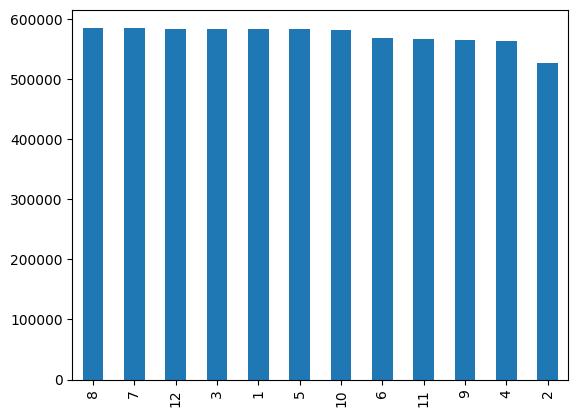

In [43]:
ax = credit_df.tran_month.value_counts().plot(kind = 'bar')


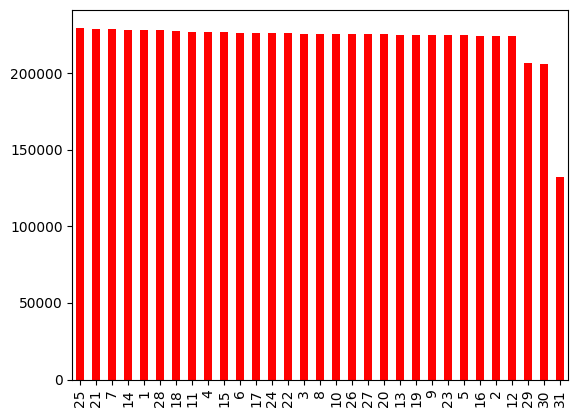

In [44]:
ax2 = credit_df['tran_day'].value_counts().plot(kind ='bar', color = 'r')


<Axes: ylabel='year'>

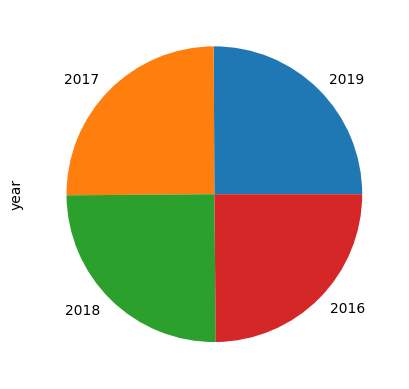

In [45]:
credit_df['year'].value_counts().plot(kind = 'pie')

In [46]:
credit_df.duplicated().sum()

16

In [47]:
credit_df.isnull().sum()

user                                      0
card                                      0
year                                      0
tran_month                                0
tran_day                                  0
time                                      0
amount                                    0
use_chip                                  0
merchant_city                             0
merchant_state                       860764
merchant_zipcode                     907586
mcc                                       0
errors?                             6768768
is_fraud?                                 0
minute                                    0
time_of_day                               0
target                                    0
charge_off                                0
merchant_city_rome                        0
person                                    0
current_age                               0
retirement_age                            0
gender                          

<Axes: xlabel='is_fraud?', ylabel='count'>

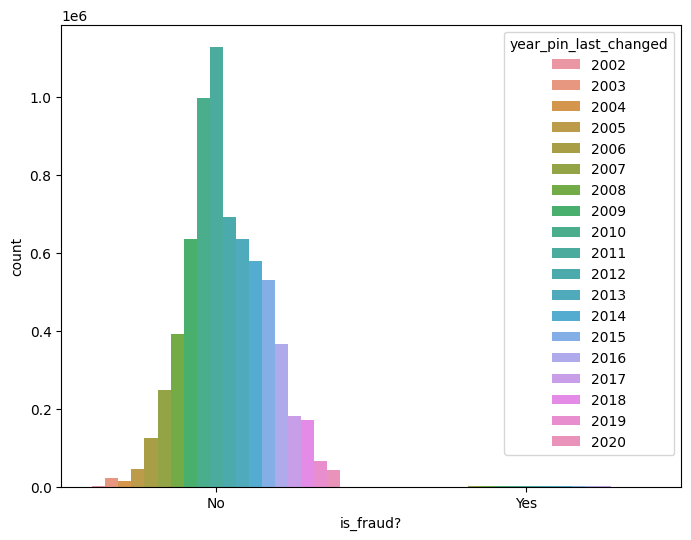

In [48]:
plt.figure(figsize = (8,6))
sns.countplot(data = credit_df, x = 'is_fraud?', hue = 'year_pin_last_changed')

In [49]:
#Finding duplicates in errors? and is_fraud? columns
credit_df[['errors?', 'is_fraud?']].drop_duplicates(inplace = False)

,errors?,is_fraud?
0,None,No
14,Insufficient Balance,No
157,Bad PIN,No
191,Technical Glitch,No
1691,None,Yes
3775,Bad Expiration,No
4669,Bad Card Number,No
5595,Bad CVV,No
10964,Technical Glitch,Yes
10970,Insufficient Balance,Yes


In [50]:
credit_df[['user', 'target']].drop_duplicates(inplace = False)

,user,target
0,0,0
1691,0,1
4653,1,0
4731,1,1
6910,2,0
...,...,...
6861147,1996,1
6865345,1997,0
6869083,1997,1
6870416,1998,0


In [51]:
credit_df[['is_fraud?', 'target']].drop_duplicates(inplace = False)

,is_fraud?,target
0,No,0
1691,Yes,1


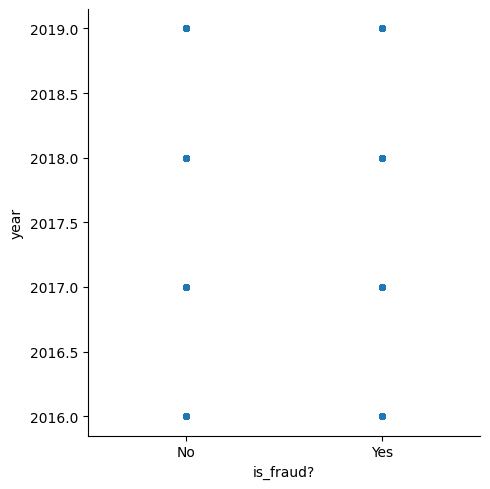

In [52]:
sns.catplot(data = credit_df, y = 'year', x = 'is_fraud?', jitter = False)

In [53]:
credit_df['user'].duplicated().sum()

6876227

In [54]:
credit_df.shape

(6877837, 50)

In [55]:
credit_df.size

343891850

In [56]:
credit_df.tail(5)

,user,card,year,tran_month,tran_day,time,amount,use_chip,merchant_city,merchant_state,merchant_zipcode,mcc,errors?,is_fraud?,minute,time_of_day,target,charge_off,merchant_city_rome,person,current_age,retirement_age,gender,address,person_city,person_state,person_zipcode,latitude,longitude,per_capita_income,yearly_income,total_debt,fico_score,num_credit_cards,personal_income_diff,total_debt_personal_income_ratio,total_debt_cards_ratio,card_brand,card_type,expires,cvv,has_chip,cards_issued,credit_limit,acct_open_date,year_pin_last_changed,card_on_dark_web,rolling_fraud_count,rolling_tran_count,transaction_count
6877832,1999,1,2019,12,30,11:38,66.53,Chip Transaction,Milford,NH,3055.0,7538,None,No,38,day hours,0,0.0,False,Kenia Harris,21,60,Female,472 Ocean View Street,Merrimack,NH,3054,42.86,-71.48,32325.0,65909.0,181261.0,673,2,33584.0,2.750171,90630.5,Visa,Credit,12/2020,120,YES,1,14400.0,05/2017,2017,No,0.0,9607.94,161.0
6877833,1999,1,2019,12,30,12:03,99.67,Chip Transaction,Merrimack,NH,3054.0,5411,None,No,03,day hours,0,0.0,False,Kenia Harris,21,60,Female,472 Ocean View Street,Merrimack,NH,3054,42.86,-71.48,32325.0,65909.0,181261.0,673,2,33584.0,2.750171,90630.5,Visa,Credit,12/2020,120,YES,1,14400.0,05/2017,2017,No,0.0,9607.94,161.0
6877834,1999,1,2019,12,30,18:44,93.63,Chip Transaction,Merrimack,NH,3054.0,5651,None,No,44,day hours,0,0.0,False,Kenia Harris,21,60,Female,472 Ocean View Street,Merrimack,NH,3054,42.86,-71.48,32325.0,65909.0,181261.0,673,2,33584.0,2.750171,90630.5,Visa,Credit,12/2020,120,YES,1,14400.0,05/2017,2017,No,0.0,9607.94,161.0
6877835,1999,1,2019,12,30,20:09,67.60,Online Transaction,ONLINE,None,NaN,4121,None,No,09,off hours,0,0.0,False,Kenia Harris,21,60,Female,472 Ocean View Street,Merrimack,NH,3054,42.86,-71.48,32325.0,65909.0,181261.0,673,2,33584.0,2.750171,90630.5,Visa,Credit,12/2020,120,YES,1,14400.0,05/2017,2017,No,0.0,9607.94,161.0
6877836,1999,1,2019,12,31,20:26,51.71,Chip Transaction,Merrimack,NH,3054.0,4121,None,No,26,off hours,0,0.0,False,Kenia Harris,21,60,Female,472 Ocean View Street,Merrimack,NH,3054,42.86,-71.48,32325.0,65909.0,181261.0,673,2,33584.0,2.750171,90630.5,Visa,Credit,12/2020,120,YES,1,14400.0,05/2017,2017,No,0.0,9741.23,161.0


In [57]:
#fill null values using mode function
#credit_df['is_fraud?'].fillna(credit_df['is_fraud?'].mode(), inplace = True)

In [58]:
#credit_df['errors?'].fillna(credit_df['errors?'].mode(), inplace = True)

In [59]:
mode_value = credit_df['errors?'].mode().iloc[0]
mode_value

'Insufficient Balance'

In [60]:
#credit_df['errors?'].fillna(mode_value, inplace=True)

In [61]:
credit_df['errors?'].isnull().sum()

6768768

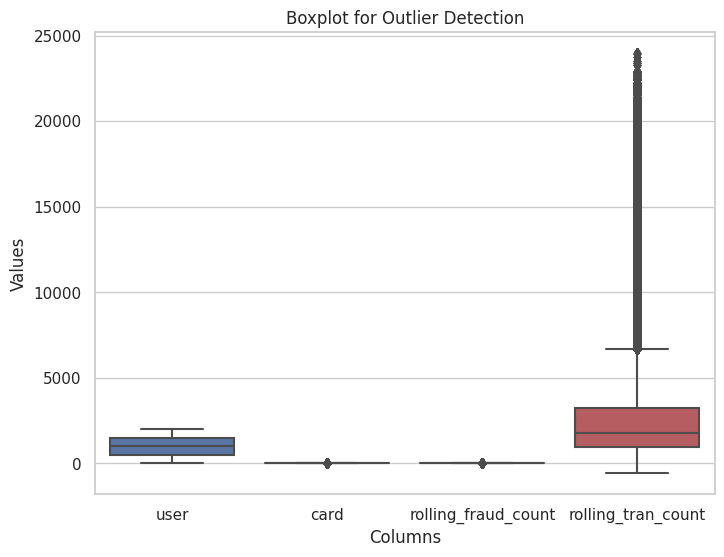

In [62]:
# Specify the columns to check for outliers
columns_to_check = ['user', 'card', 'rolling_fraud_count','rolling_tran_count']

# Create a boxplot for the specified columns
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.boxplot(data=credit_df[columns_to_check])
plt.title("Boxplot for Outlier Detection")
plt.xlabel("Columns")
plt.ylabel("Values")
plt.show()

In [63]:
credit_df.year.drop_duplicates(inplace=False)

0      2016
202    2017
404    2018
640    2019
Name: year, dtype: int64

<Axes: >

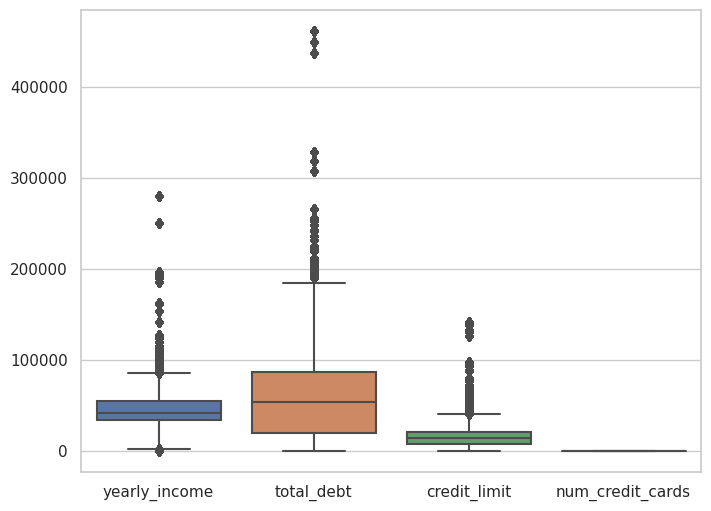

In [64]:
credit_column_check = ['yearly_income','total_debt','credit_limit', 'num_credit_cards']
plt.figure(figsize = (8,6))
sns.boxplot(data = credit_df[credit_column_check])


There are outlires in yearl_income, total_debt, and credit_limit columns.

In [65]:
#Finding maximum values in each columns
credit_df.yearly_income.max(), credit_df.total_debt.max(), credit_df.credit_limit.max()

(280199.0, 461854.0, 141391.0)

In [66]:
#sns.catplot(x="tran_month", y="per_capita_income", hue="is_fraud?", data=credit_df)
#plt.title("Transaction month vs fraud")
#plt.show()

(array([1109450.,  583913.,  564040.,  583058.,  568387.,  585076.,
         586098.,  565220.,  581269., 1151326.]),
 array([ 1. ,  2.1,  3.2,  4.3,  5.4,  6.5,  7.6,  8.7,  9.8, 10.9, 12. ]),
 <BarContainer object of 10 artists>)

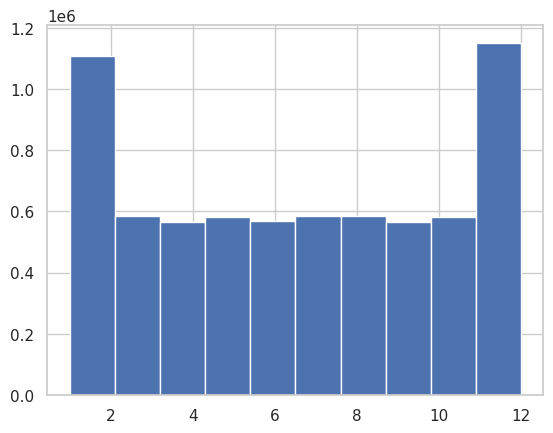

In [67]:
plt.hist(df_credit['month'])

In [68]:
#Exttracting only nontna values
df_errors = credit_df[credit_df['errors?'].notna()]
df_errors.head()

,user,card,year,tran_month,tran_day,time,amount,use_chip,merchant_city,merchant_state,merchant_zipcode,mcc,errors?,is_fraud?,minute,time_of_day,target,charge_off,merchant_city_rome,person,current_age,retirement_age,gender,address,person_city,person_state,person_zipcode,latitude,longitude,per_capita_income,yearly_income,total_debt,fico_score,num_credit_cards,personal_income_diff,total_debt_personal_income_ratio,total_debt_cards_ratio,card_brand,card_type,expires,cvv,has_chip,cards_issued,credit_limit,acct_open_date,year_pin_last_changed,card_on_dark_web,rolling_fraud_count,rolling_tran_count,transaction_count
14,0,0,2016,1,24,20:26,106.81,Swipe Transaction,La Verne,CA,91750.0,5812,Insufficient Balance,No,26,off hours,0,0.0,False,Hazel Robinson,53,66,Female,462 Rose Lane,La Verne,CA,91750,34.15,-117.76,29278.0,59696.0,127613.0,787,5,30418.0,2.137714,25522.6,Visa,Debit,12/2022,623,YES,2,24295.0,09/2002,2008,No,0.0,718.78,12.0
43,0,0,2016,3,30,09:00,48.91,Chip Transaction,La Verne,CA,91750.0,7538,Insufficient Balance,No,00,morning hours,0,0.0,False,Hazel Robinson,53,66,Female,462 Rose Lane,La Verne,CA,91750,34.15,-117.76,29278.0,59696.0,127613.0,787,5,30418.0,2.137714,25522.6,Visa,Debit,12/2022,623,YES,2,24295.0,09/2002,2008,No,0.0,401.27,9.0
77,0,0,2016,6,6,06:03,121.85,Chip Transaction,La Verne,CA,91750.0,5311,Insufficient Balance,No,03,morning hours,0,0.0,False,Hazel Robinson,53,66,Female,462 Rose Lane,La Verne,CA,91750,34.15,-117.76,29278.0,59696.0,127613.0,787,5,30418.0,2.137714,25522.6,Visa,Debit,12/2022,623,YES,2,24295.0,09/2002,2008,No,0.0,776.95,16.0
86,0,0,2016,6,17,20:10,78.86,Swipe Transaction,La Verne,CA,91750.0,5812,Insufficient Balance,No,10,off hours,0,0.0,False,Hazel Robinson,53,66,Female,462 Rose Lane,La Verne,CA,91750,34.15,-117.76,29278.0,59696.0,127613.0,787,5,30418.0,2.137714,25522.6,Visa,Debit,12/2022,623,YES,2,24295.0,09/2002,2008,No,0.0,666.24,17.0
157,0,0,2016,10,17,06:02,150.85,Chip Transaction,La Verne,CA,91750.0,5411,Bad PIN,No,02,morning hours,0,0.0,False,Hazel Robinson,53,66,Female,462 Rose Lane,La Verne,CA,91750,34.15,-117.76,29278.0,59696.0,127613.0,787,5,30418.0,2.137714,25522.6,Visa,Debit,12/2022,623,YES,2,24295.0,09/2002,2008,No,0.0,1230.28,16.0


In [69]:
#Converting df_errors into csv file, that file will use for visualization in Tableau. Converted date and time in string will remove that would help to train the model.
#df_errors.to_csv('credit_errors.csv', index = False)

In [70]:
credit_df.columns

Index(['user', 'card', 'year', 'tran_month', 'tran_day', 'time', 'amount',
       'use_chip', 'merchant_city', 'merchant_state', 'merchant_zipcode',
       'mcc', 'errors?', 'is_fraud?', 'minute', 'time_of_day', 'target',
       'charge_off', 'merchant_city_rome', 'person', 'current_age',
       'retirement_age', 'gender', 'address', 'person_city', 'person_state',
       'person_zipcode', 'latitude', 'longitude', 'per_capita_income',
       'yearly_income', 'total_debt', 'fico_score', 'num_credit_cards',
       'personal_income_diff', 'total_debt_personal_income_ratio',
       'total_debt_cards_ratio', 'card_brand', 'card_type', 'expires', 'cvv',
       'has_chip', 'cards_issued', 'credit_limit', 'acct_open_date',
       'year_pin_last_changed', 'card_on_dark_web', 'rolling_fraud_count',
       'rolling_tran_count', 'transaction_count'],
      dtype='object')

In [71]:
df_error_none = credit_df[credit_df['errors?'].isnull()]
df_error_none.head()

,user,card,year,tran_month,tran_day,time,amount,use_chip,merchant_city,merchant_state,merchant_zipcode,mcc,errors?,is_fraud?,minute,time_of_day,target,charge_off,merchant_city_rome,person,current_age,retirement_age,gender,address,person_city,person_state,person_zipcode,latitude,longitude,per_capita_income,yearly_income,total_debt,fico_score,num_credit_cards,personal_income_diff,total_debt_personal_income_ratio,total_debt_cards_ratio,card_brand,card_type,expires,cvv,has_chip,cards_issued,credit_limit,acct_open_date,year_pin_last_changed,card_on_dark_web,rolling_fraud_count,rolling_tran_count,transaction_count
0,0,0,2016,1,3,10:48,66.48,Chip Transaction,La Verne,CA,91750.0,7538,None,No,48,day hours,0,0.0,False,Hazel Robinson,53,66,Female,462 Rose Lane,La Verne,CA,91750,34.15,-117.76,29278.0,59696.0,127613.0,787,5,30418.0,2.137714,25522.6,Visa,Debit,12/2022,623,YES,2,24295.0,09/2002,2008,No,NaN,NaN,NaN
1,0,0,2016,1,4,06:43,40.02,Chip Transaction,La Verne,CA,91750.0,5912,None,No,43,morning hours,0,0.0,False,Hazel Robinson,53,66,Female,462 Rose Lane,La Verne,CA,91750,34.15,-117.76,29278.0,59696.0,127613.0,787,5,30418.0,2.137714,25522.6,Visa,Debit,12/2022,623,YES,2,24295.0,09/2002,2008,No,0.0,66.48,1.0
2,0,0,2016,1,7,09:30,54.11,Chip Transaction,La Verne,CA,91750.0,7538,None,No,30,morning hours,0,0.0,False,Hazel Robinson,53,66,Female,462 Rose Lane,La Verne,CA,91750,34.15,-117.76,29278.0,59696.0,127613.0,787,5,30418.0,2.137714,25522.6,Visa,Debit,12/2022,623,YES,2,24295.0,09/2002,2008,No,0.0,106.50,2.0
3,0,0,2016,1,7,16:03,89.48,Chip Transaction,Monterey Park,CA,91754.0,5651,None,No,03,day hours,0,0.0,False,Hazel Robinson,53,66,Female,462 Rose Lane,La Verne,CA,91750,34.15,-117.76,29278.0,59696.0,127613.0,787,5,30418.0,2.137714,25522.6,Visa,Debit,12/2022,623,YES,2,24295.0,09/2002,2008,No,0.0,106.50,2.0
4,0,0,2016,1,10,06:38,29.15,Chip Transaction,Monterey Park,CA,91755.0,5942,None,No,38,morning hours,0,0.0,False,Hazel Robinson,53,66,Female,462 Rose Lane,La Verne,CA,91750,34.15,-117.76,29278.0,59696.0,127613.0,787,5,30418.0,2.137714,25522.6,Visa,Debit,12/2022,623,YES,2,24295.0,09/2002,2008,No,0.0,250.09,4.0


In [72]:
#converting df_error to csv for visualization, that file is too big, size is 2.23 gb.
#df_error_none.to_csv('credit_error_none.csv', index = False)

In [73]:
df_error_none.tail(20)

,user,card,year,tran_month,tran_day,time,amount,use_chip,merchant_city,merchant_state,merchant_zipcode,mcc,errors?,is_fraud?,minute,time_of_day,target,charge_off,merchant_city_rome,person,current_age,retirement_age,gender,address,person_city,person_state,person_zipcode,latitude,longitude,per_capita_income,yearly_income,total_debt,fico_score,num_credit_cards,personal_income_diff,total_debt_personal_income_ratio,total_debt_cards_ratio,card_brand,card_type,expires,cvv,has_chip,cards_issued,credit_limit,acct_open_date,year_pin_last_changed,card_on_dark_web,rolling_fraud_count,rolling_tran_count,transaction_count
6877817,1999,1,2019,12,27,08:20,45.97,Online Transaction,ONLINE,None,NaN,4121,None,No,20,morning hours,0,0.0,False,Kenia Harris,21,60,Female,472 Ocean View Street,Merrimack,NH,3054,42.86,-71.48,32325.0,65909.0,181261.0,673,2,33584.0,2.750171,90630.5,Visa,Credit,12/2020,120,YES,1,14400.0,05/2017,2017,No,0.0,9307.30,159.0
6877818,1999,1,2019,12,27,09:04,140.00,Chip Transaction,Berlin,NH,3570.0,4829,None,No,04,morning hours,0,0.0,False,Kenia Harris,21,60,Female,472 Ocean View Street,Merrimack,NH,3054,42.86,-71.48,32325.0,65909.0,181261.0,673,2,33584.0,2.750171,90630.5,Visa,Credit,12/2020,120,YES,1,14400.0,05/2017,2017,No,0.0,9307.30,159.0
6877819,1999,1,2019,12,27,20:14,48.77,Chip Transaction,Merrimack,NH,3054.0,4121,None,No,14,off hours,0,0.0,False,Kenia Harris,21,60,Female,472 Ocean View Street,Merrimack,NH,3054,42.86,-71.48,32325.0,65909.0,181261.0,673,2,33584.0,2.750171,90630.5,Visa,Credit,12/2020,120,YES,1,14400.0,05/2017,2017,No,0.0,9307.30,159.0
6877820,1999,1,2019,12,27,20:35,29.43,Online Transaction,ONLINE,None,NaN,4121,None,No,35,off hours,0,0.0,False,Kenia Harris,21,60,Female,472 Ocean View Street,Merrimack,NH,3054,42.86,-71.48,32325.0,65909.0,181261.0,673,2,33584.0,2.750171,90630.5,Visa,Credit,12/2020,120,YES,1,14400.0,05/2017,2017,No,0.0,9307.30,159.0
6877821,1999,1,2019,12,28,00:34,232.68,Online Transaction,ONLINE,None,NaN,4814,None,No,34,off hours,0,0.0,False,Kenia Harris,21,60,Female,472 Ocean View Street,Merrimack,NH,3054,42.86,-71.48,32325.0,65909.0,181261.0,673,2,33584.0,2.750171,90630.5,Visa,Credit,12/2020,120,YES,1,14400.0,05/2017,2017,No,0.0,9349.21,157.0
6877822,1999,1,2019,12,28,07:52,42.39,Online Transaction,ONLINE,None,NaN,4121,None,No,52,morning hours,0,0.0,False,Kenia Harris,21,60,Female,472 Ocean View Street,Merrimack,NH,3054,42.86,-71.48,32325.0,65909.0,181261.0,673,2,33584.0,2.750171,90630.5,Visa,Credit,12/2020,120,YES,1,14400.0,05/2017,2017,No,0.0,9349.21,157.0
6877823,1999,1,2019,12,28,11:55,80.58,Chip Transaction,Merrimack,NH,3054.0,7538,None,No,55,day hours,0,0.0,False,Kenia Harris,21,60,Female,472 Ocean View Street,Merrimack,NH,3054,42.86,-71.48,32325.0,65909.0,181261.0,673,2,33584.0,2.750171,90630.5,Visa,Credit,12/2020,120,YES,1,14400.0,05/2017,2017,No,0.0,9349.21,157.0
6877824,1999,1,2019,12,28,15:07,8.15,Chip Transaction,Merrimack,NH,3054.0,5411,None,No,07,day hours,0,0.0,False,Kenia Harris,21,60,Female,472 Ocean View Street,Merrimack,NH,3054,42.86,-71.48,32325.0,65909.0,181261.0,673,2,33584.0,2.750171,90630.5,Visa,Credit,12/2020,120,YES,1,14400.0,05/2017,2017,No,0.0,9349.21,157.0
6877825,1999,1,2019,12,28,20:24,43.69,Chip Transaction,Merrimack,NH,3054.0,4121,None,No,24,off hours,0,0.0,False,Kenia Harris,21,60,Female,472 Ocean View Street,Merrimack,NH,3054,42.86,-71.48,32325.0,65909.0,181261.0,673,2,33584.0,2.750171,90630.5,Visa,Credit,12/2020,120,YES,1,14400.0,05/2017,2017,No,0.0,9349.21,157.0
6877826,1999,1,2019,12,28,22:08,75.00,Chip Transaction,Merrimack,NH,3054.0,5541,None,No,08,off hours,0,0.0,False,Kenia Harris,21,60,Female,472 Ocean View Street,Merrimack,NH,3054,42.86,-71.48,32325.0,65909.0,181261.0,673,2,33584.0,2.750171,90630.5,Visa,Credit,12/2020,120,YES,1,14400.0,05/2017,2017,No,0.0,9349.21,157.0


In [74]:
df_error_none

,user,card,year,tran_month,tran_day,time,amount,use_chip,merchant_city,merchant_state,merchant_zipcode,mcc,errors?,is_fraud?,minute,time_of_day,target,charge_off,merchant_city_rome,person,current_age,retirement_age,gender,address,person_city,person_state,person_zipcode,latitude,longitude,per_capita_income,yearly_income,total_debt,fico_score,num_credit_cards,personal_income_diff,total_debt_personal_income_ratio,total_debt_cards_ratio,card_brand,card_type,expires,cvv,has_chip,cards_issued,credit_limit,acct_open_date,year_pin_last_changed,card_on_dark_web,rolling_fraud_count,rolling_tran_count,transaction_count
0,0,0,2016,1,3,10:48,66.48,Chip Transaction,La Verne,CA,91750.0,7538,None,No,48,day hours,0,0.0,False,Hazel Robinson,53,66,Female,462 Rose Lane,La Verne,CA,91750,34.15,-117.76,29278.0,59696.0,127613.0,787,5,30418.0,2.137714,25522.6,Visa,Debit,12/2022,623,YES,2,24295.0,09/2002,2008,No,NaN,NaN,NaN
1,0,0,2016,1,4,06:43,40.02,Chip Transaction,La Verne,CA,91750.0,5912,None,No,43,morning hours,0,0.0,False,Hazel Robinson,53,66,Female,462 Rose Lane,La Verne,CA,91750,34.15,-117.76,29278.0,59696.0,127613.0,787,5,30418.0,2.137714,25522.6,Visa,Debit,12/2022,623,YES,2,24295.0,09/2002,2008,No,0.0,66.48,1.0
2,0,0,2016,1,7,09:30,54.11,Chip Transaction,La Verne,CA,91750.0,7538,None,No,30,morning hours,0,0.0,False,Hazel Robinson,53,66,Female,462 Rose Lane,La Verne,CA,91750,34.15,-117.76,29278.0,59696.0,127613.0,787,5,30418.0,2.137714,25522.6,Visa,Debit,12/2022,623,YES,2,24295.0,09/2002,2008,No,0.0,106.50,2.0
3,0,0,2016,1,7,16:03,89.48,Chip Transaction,Monterey Park,CA,91754.0,5651,None,No,03,day hours,0,0.0,False,Hazel Robinson,53,66,Female,462 Rose Lane,La Verne,CA,91750,34.15,-117.76,29278.0,59696.0,127613.0,787,5,30418.0,2.137714,25522.6,Visa,Debit,12/2022,623,YES,2,24295.0,09/2002,2008,No,0.0,106.50,2.0
4,0,0,2016,1,10,06:38,29.15,Chip Transaction,Monterey Park,CA,91755.0,5942,None,No,38,morning hours,0,0.0,False,Hazel Robinson,53,66,Female,462 Rose Lane,La Verne,CA,91750,34.15,-117.76,29278.0,59696.0,127613.0,787,5,30418.0,2.137714,25522.6,Visa,Debit,12/2022,623,YES,2,24295.0,09/2002,2008,No,0.0,250.09,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6877832,1999,1,2019,12,30,11:38,66.53,Chip Transaction,Milford,NH,3055.0,7538,None,No,38,day hours,0,0.0,False,Kenia Harris,21,60,Female,472 Ocean View Street,Merrimack,NH,3054,42.86,-71.48,32325.0,65909.0,181261.0,673,2,33584.0,2.750171,90630.5,Visa,Credit,12/2020,120,YES,1,14400.0,05/2017,2017,No,0.0,9607.94,161.0
6877833,1999,1,2019,12,30,12:03,99.67,Chip Transaction,Merrimack,NH,3054.0,5411,None,No,03,day hours,0,0.0,False,Kenia Harris,21,60,Female,472 Ocean View Street,Merrimack,NH,3054,42.86,-71.48,32325.0,65909.0,181261.0,673,2,33584.0,2.750171,90630.5,Visa,Credit,12/2020,120,YES,1,14400.0,05/2017,2017,No,0.0,9607.94,161.0
6877834,1999,1,2019,12,30,18:44,93.63,Chip Transaction,Merrimack,NH,3054.0,5651,None,No,44,day hours,0,0.0,False,Kenia Harris,21,60,Female,472 Ocean View Street,Merrimack,NH,3054,42.86,-71.48,32325.0,65909.0,181261.0,673,2,33584.0,2.750171,90630.5,Visa,Credit,12/2020,120,YES,1,14400.0,05/2017,2017,No,0.0,9607.94,161.0
6877835,1999,1,2019,12,30,20:09,67.60,Online Transaction,ONLINE,None,NaN,4121,None,No,09,off hours,0,0.0,False,Kenia Harris,21,60,Female,472 Ocean View Street,Merrimack,NH,3054,42.86,-71.48,32325.0,65909.0,181261.0,673,2,33584.0,2.750171,90630.5,Visa,Credit,12/2020,120,YES,1,14400.0,05/2017,2017,No,0.0,9607.94,161.0


In [75]:
len(df_error_none[df_error_none['errors?'].isnull()])

6768768

In [76]:
df_error_none.target.value_counts()

0    6760691
1       8077
Name: target, dtype: int64

In [77]:
df_error_none.card_brand.value_counts

<bound method IndexOpsMixin.value_counts of 0          Visa
1          Visa
2          Visa
3          Visa
4          Visa
           ... 
6877832    Visa
6877833    Visa
6877834    Visa
6877835    Visa
6877836    Visa
Name: card_brand, Length: 6768768, dtype: object>

I extracted None values from the errors? column, most of the values of each columns are duplicated,and is_fraud is 'No'. for more investigation of that data set. I will use visualization, so I can get all related values in each row.

In [78]:
none_error_fraud = df_error_none.groupby(['is_fraud?', 'time_of_day'])['amount'].mean().sort_values(ascending = False)
none_error_fraud

is_fraud?  time_of_day  
Yes        day hours        103.176308
           off hours         70.043103
No         off hours         51.049382
           day hours         43.958715
Yes        morning hours     39.874726
No         morning hours     33.842752
Name: amount, dtype: float64

<Axes: xlabel='is_fraud?,time_of_day'>

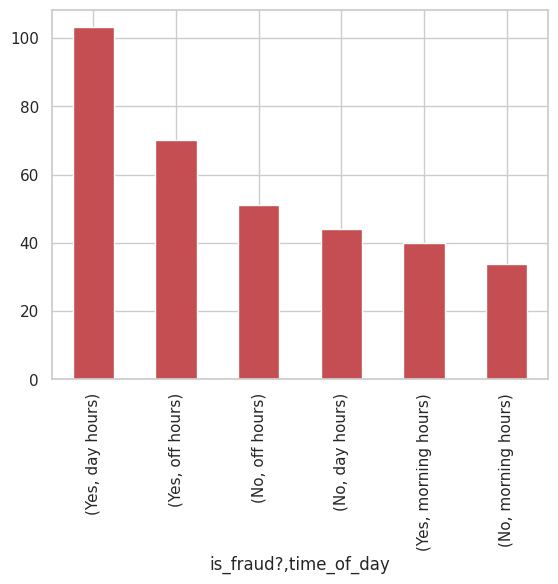

In [79]:
none_error_fraud.plot(kind = 'bar', color = 'r')

Fraud incidents tend to occur during daytime hours when the average transaction amount is higher, similar to off-hours. Conversely, during the morning hours, the average transaction amount is lower, yet fraudsters remain active during this time as well.

<Axes: >

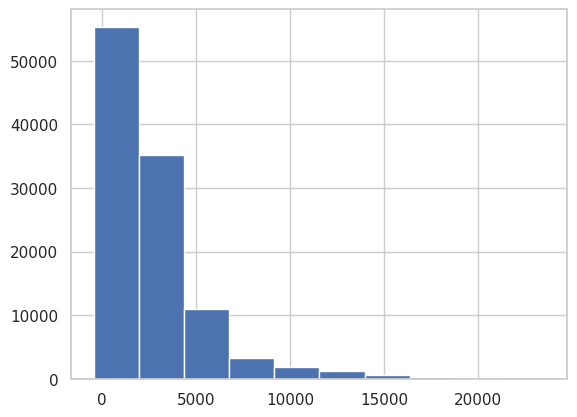

In [80]:
df_errors['rolling_tran_count'].hist()

In [81]:
df_errors.shape

(109069, 50)

In [82]:
df_errors.size

5453450

In [83]:
errors_gp = df_errors.groupby(['errors?', 'is_fraud?'])['minute'].median().sort_values(ascending =False )
errors_gp


errors?                                is_fraud?
Bad CVV,Insufficient Balance           Yes          58.0
Technical Glitch                       Yes          38.5
Bad CVV,Technical Glitch               No           38.0
Bad Card Number,Bad Expiration         No           37.5
Bad Zipcode,Insufficient Balance       No           37.0
Bad PIN,Technical Glitch               No           35.5
Insufficient Balance,Technical Glitch  No           34.0
Bad Expiration,Bad CVV                 No           33.0
Bad CVV,Insufficient Balance           No           32.0
Bad Card Number                        Yes          31.0
Insufficient Balance                   Yes          31.0
Bad PIN,Insufficient Balance           No           31.0
Bad PIN                                No           30.0
Bad CVV                                No           30.0
Bad Card Number,Insufficient Balance   No           30.0
Bad Card Number                        No           30.0
Bad Expiration                         

Bad cvv and insufficient balance has a fraud it occurs twice in that data set, and it happend when it took longer minute, while same error occured when transaction took 32 minute, but fraud didn't happen. Bad zipcode, technical gltich, bad expiration errors didn't cause the fraud

<Axes: xlabel='errors?,is_fraud?'>

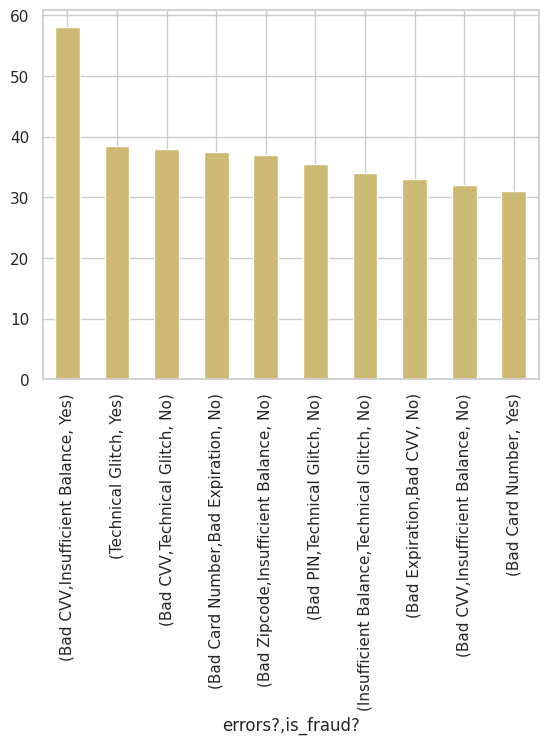

In [84]:
#Top 10 errors with fraud vs not fraud with maximum minute
errors_gp[:10].plot(kind = 'bar', color = 'y')

In [85]:
df_errors.describe()

,user,card,year,tran_month,tran_day,amount,merchant_zipcode,mcc,target,charge_off,current_age,retirement_age,person_zipcode,latitude,longitude,per_capita_income,yearly_income,total_debt,fico_score,num_credit_cards,personal_income_diff,total_debt_personal_income_ratio,total_debt_cards_ratio,cvv,cards_issued,credit_limit,year_pin_last_changed,rolling_fraud_count,rolling_tran_count,transaction_count
count,109069.000000,109069.000000,109069.000000,109069.000000,109069.000000,109069.000000,88857.000000,109069.000000,109069.000000,109069.000000,109069.000000,109069.000000,109069.000000,109069.000000,109069.000000,109069.000000,109069.000000,109069.000000,109069.000000,109069.000000,109069.000000,109069.000000,109069.000000,109069.000000,109069.000000,109069.000000,109069.000000,108941.000000,108941.000000,108941.000000
mean,999.479861,1.266134,2017.500601,6.531168,15.734443,59.783777,51642.054391,5480.583796,0.003071,0.245463,52.717738,66.335549,50514.299416,37.294643,-91.630021,23088.980132,44758.676370,57292.405670,717.243176,3.575370,21669.696238,1.264741,23964.120814,493.008288,1.526465,15389.856339,2011.660371,0.051496,2727.218366,61.646258
std,568.481918,1.363278,1.118568,3.439854,8.805249,65.110709,29286.874175,870.064301,0.055336,7.795372,16.387408,3.552871,29470.613855,5.102318,16.201472,10405.534286,21425.363786,49059.099653,65.197221,1.589628,12153.199947,0.878022,32177.997199,289.281491,0.516398,11359.184718,2.983685,0.570905,2657.570271,50.883071
min,0.000000,0.000000,2016.000000,1.000000,1.000000,-497.000000,1001.000000,1711.000000,0.000000,-497.000000,19.000000,50.000000,1107.000000,21.300000,-159.410000,0.000000,1.000000,0.000000,488.000000,1.000000,-8808.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2002.000000,0.000000,-405.210000,1.000000
25%,513.000000,0.000000,2017.000000,4.000000,8.000000,23.910000,28716.000000,4829.000000,0.000000,0.000000,40.000000,65.000000,28312.000000,33.840000,-97.480000,16901.000000,32387.000000,18116.000000,685.000000,3.000000,15596.000000,0.480983,4834.400000,242.000000,1.000000,8021.000000,2010.000000,0.000000,1022.940000,28.000000
50%,998.000000,1.000000,2017.000000,7.000000,16.000000,56.320000,47803.000000,5411.000000,0.000000,0.000000,51.000000,66.000000,46221.000000,38.020000,-86.470000,20447.000000,39796.000000,51679.000000,719.000000,4.000000,19640.000000,1.312929,14857.600000,491.000000,2.000000,13529.000000,2011.000000,0.000000,1952.760000,48.000000
75%,1474.000000,2.000000,2019.000000,10.000000,23.000000,85.490000,78204.000000,5812.000000,0.000000,0.000000,63.000000,68.000000,77539.000000,41.090000,-80.160000,26476.000000,52397.000000,83995.000000,761.000000,5.000000,26565.000000,1.880085,27778.000000,740.000000,2.000000,20612.000000,2014.000000,0.000000,3459.070000,77.000000
max,1999.000000,8.000000,2019.000000,12.000000,31.000000,3613.220000,99687.000000,9402.000000,1.000000,890.160000,101.000000,79.000000,99508.000000,61.200000,-68.670000,163145.000000,280199.000000,461854.000000,850.000000,9.000000,142771.000000,4.678159,317964.000000,999.000000,3.000000,141391.000000,2020.000000,20.000000,23538.220000,381.000000


In [86]:
#With error dataframe
df1 = df_errors.groupby(['is_fraud?', 'user'])['card'].count().sort_values(ascending= False)
df1

is_fraud?  user
No         803     1178
           332      858
           1671     503
           1249     460
           341      352
                   ... 
Yes        785        1
           802        1
           813        1
           814        1
           531        1
Name: card, Length: 1827, dtype: int64

In [87]:
df_errors[df_errors['user'] == 803]

,user,card,year,tran_month,tran_day,time,amount,use_chip,merchant_city,merchant_state,merchant_zipcode,mcc,errors?,is_fraud?,minute,time_of_day,target,charge_off,merchant_city_rome,person,current_age,retirement_age,gender,address,person_city,person_state,person_zipcode,latitude,longitude,per_capita_income,yearly_income,total_debt,fico_score,num_credit_cards,personal_income_diff,total_debt_personal_income_ratio,total_debt_cards_ratio,card_brand,card_type,expires,cvv,has_chip,cards_issued,credit_limit,acct_open_date,year_pin_last_changed,card_on_dark_web,rolling_fraud_count,rolling_tran_count,transaction_count
2649081,803,0,2016,1,2,07:10,80.0,Chip Transaction,Riverside,CA,92508.0,4829,Insufficient Balance,No,10,morning hours,0,0.0,False,Jerry Abe,51,65,Male,691 Ocean View Street,Riverside,CA,92505,33.93,-117.49,18619.0,37963.0,102716.0,772,4,19344.0,2.705687,25679.0,Mastercard,Debit,08/2024,471,YES,2,18320.0,04/2010,2010,No,0.0,33.31,1.0
2649087,803,0,2016,1,4,06:41,80.0,Chip Transaction,Riverside,CA,92508.0,4829,Insufficient Balance,No,41,morning hours,0,0.0,False,Jerry Abe,51,65,Male,691 Ocean View Street,Riverside,CA,92505,33.93,-117.49,18619.0,37963.0,102716.0,772,4,19344.0,2.705687,25679.0,Mastercard,Debit,08/2024,471,YES,2,18320.0,04/2010,2010,No,0.0,356.65,7.0
2649094,803,0,2016,1,7,08:24,80.0,Chip Transaction,Riverside,CA,92508.0,4829,Insufficient Balance,No,24,morning hours,0,0.0,False,Jerry Abe,51,65,Male,691 Ocean View Street,Riverside,CA,92505,33.93,-117.49,18619.0,37963.0,102716.0,772,4,19344.0,2.705687,25679.0,Mastercard,Debit,08/2024,471,YES,2,18320.0,04/2010,2010,No,0.0,855.07,13.0
2649104,803,0,2016,1,14,07:06,80.0,Chip Transaction,Riverside,CA,92508.0,4829,Insufficient Balance,No,06,morning hours,0,0.0,False,Jerry Abe,51,65,Male,691 Ocean View Street,Riverside,CA,92505,33.93,-117.49,18619.0,37963.0,102716.0,772,4,19344.0,2.705687,25679.0,Mastercard,Debit,08/2024,471,YES,2,18320.0,04/2010,2010,No,0.0,1379.63,24.0
2649106,803,0,2016,1,15,07:15,80.0,Chip Transaction,Riverside,CA,92508.0,4829,Insufficient Balance,No,15,morning hours,0,0.0,False,Jerry Abe,51,65,Male,691 Ocean View Street,Riverside,CA,92505,33.93,-117.49,18619.0,37963.0,102716.0,772,4,19344.0,2.705687,25679.0,Mastercard,Debit,08/2024,471,YES,2,18320.0,04/2010,2010,No,0.0,1522.77,26.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2657146,803,3,2019,12,14,07:22,80.0,Chip Transaction,Riverside,CA,92508.0,4829,Insufficient Balance,No,22,morning hours,0,0.0,False,Jerry Abe,51,65,Male,691 Ocean View Street,Riverside,CA,92505,33.93,-117.49,18619.0,37963.0,102716.0,772,4,19344.0,2.705687,25679.0,Visa,Debit,10/2024,359,YES,1,24104.0,11/2009,2009,No,0.0,2943.96,62.0
2657147,803,3,2019,12,14,07:23,80.0,Chip Transaction,Riverside,CA,92508.0,4829,Insufficient Balance,No,23,morning hours,0,0.0,False,Jerry Abe,51,65,Male,691 Ocean View Street,Riverside,CA,92505,33.93,-117.49,18619.0,37963.0,102716.0,772,4,19344.0,2.705687,25679.0,Visa,Debit,10/2024,359,YES,1,24104.0,11/2009,2009,No,0.0,2943.96,62.0
2657149,803,3,2019,12,14,07:41,80.0,Chip Transaction,Riverside,CA,92508.0,4829,Insufficient Balance,No,41,morning hours,0,0.0,False,Jerry Abe,51,65,Male,691 Ocean View Street,Riverside,CA,92505,33.93,-117.49,18619.0,37963.0,102716.0,772,4,19344.0,2.705687,25679.0,Visa,Debit,10/2024,359,YES,1,24104.0,11/2009,2009,No,0.0,2943.96,62.0
2657165,803,3,2019,12,23,07:03,80.0,Chip Transaction,Riverside,CA,92508.0,4829,Insufficient Balance,No,03,morning hours,0,0.0,False,Jerry Abe,51,65,Male,691 Ocean View Street,Riverside,CA,92505,33.93,-117.49,18619.0,37963.0,102716.0,772,4,19344.0,2.705687,25679.0,Visa,Debit,10/2024,359,YES,1,24104.0,11/2009,2009,No,0.0,3196.60,62.0


In [88]:
df_errors[df_errors['errors?'] == 'Insufficient Balance']

,user,card,year,tran_month,tran_day,time,amount,use_chip,merchant_city,merchant_state,merchant_zipcode,mcc,errors?,is_fraud?,minute,time_of_day,target,charge_off,merchant_city_rome,person,current_age,retirement_age,gender,address,person_city,person_state,person_zipcode,latitude,longitude,per_capita_income,yearly_income,total_debt,fico_score,num_credit_cards,personal_income_diff,total_debt_personal_income_ratio,total_debt_cards_ratio,card_brand,card_type,expires,cvv,has_chip,cards_issued,credit_limit,acct_open_date,year_pin_last_changed,card_on_dark_web,rolling_fraud_count,rolling_tran_count,transaction_count
14,0,0,2016,1,24,20:26,106.81,Swipe Transaction,La Verne,CA,91750.0,5812,Insufficient Balance,No,26,off hours,0,0.0,False,Hazel Robinson,53,66,Female,462 Rose Lane,La Verne,CA,91750,34.15,-117.76,29278.0,59696.0,127613.0,787,5,30418.0,2.137714,25522.6,Visa,Debit,12/2022,623,YES,2,24295.0,09/2002,2008,No,0.0,718.78,12.0
43,0,0,2016,3,30,09:00,48.91,Chip Transaction,La Verne,CA,91750.0,7538,Insufficient Balance,No,00,morning hours,0,0.0,False,Hazel Robinson,53,66,Female,462 Rose Lane,La Verne,CA,91750,34.15,-117.76,29278.0,59696.0,127613.0,787,5,30418.0,2.137714,25522.6,Visa,Debit,12/2022,623,YES,2,24295.0,09/2002,2008,No,0.0,401.27,9.0
77,0,0,2016,6,6,06:03,121.85,Chip Transaction,La Verne,CA,91750.0,5311,Insufficient Balance,No,03,morning hours,0,0.0,False,Hazel Robinson,53,66,Female,462 Rose Lane,La Verne,CA,91750,34.15,-117.76,29278.0,59696.0,127613.0,787,5,30418.0,2.137714,25522.6,Visa,Debit,12/2022,623,YES,2,24295.0,09/2002,2008,No,0.0,776.95,16.0
86,0,0,2016,6,17,20:10,78.86,Swipe Transaction,La Verne,CA,91750.0,5812,Insufficient Balance,No,10,off hours,0,0.0,False,Hazel Robinson,53,66,Female,462 Rose Lane,La Verne,CA,91750,34.15,-117.76,29278.0,59696.0,127613.0,787,5,30418.0,2.137714,25522.6,Visa,Debit,12/2022,623,YES,2,24295.0,09/2002,2008,No,0.0,666.24,17.0
161,0,0,2016,10,21,16:49,121.97,Chip Transaction,Monterey Park,CA,91754.0,5651,Insufficient Balance,No,49,day hours,0,0.0,False,Hazel Robinson,53,66,Female,462 Rose Lane,La Verne,CA,91750,34.15,-117.76,29278.0,59696.0,127613.0,787,5,30418.0,2.137714,25522.6,Visa,Debit,12/2022,623,YES,2,24295.0,09/2002,2008,No,0.0,1537.39,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6875728,1999,1,2018,9,25,22:26,35.54,Chip Transaction,Merrimack,NH,3054.0,5499,Insufficient Balance,No,26,off hours,0,0.0,False,Kenia Harris,21,60,Female,472 Ocean View Street,Merrimack,NH,3054,42.86,-71.48,32325.0,65909.0,181261.0,673,2,33584.0,2.750171,90630.5,Visa,Credit,12/2020,120,YES,1,14400.0,05/2017,2017,No,0.0,6397.32,125.0
6875730,1999,1,2018,9,25,22:30,35.54,Chip Transaction,Merrimack,NH,3054.0,5499,Insufficient Balance,No,30,off hours,0,0.0,False,Kenia Harris,21,60,Female,472 Ocean View Street,Merrimack,NH,3054,42.86,-71.48,32325.0,65909.0,181261.0,673,2,33584.0,2.750171,90630.5,Visa,Credit,12/2020,120,YES,1,14400.0,05/2017,2017,No,0.0,6397.32,125.0
6876295,1999,1,2019,1,29,07:55,43.18,Chip Transaction,Merrimack,NH,3054.0,4121,Insufficient Balance,No,55,morning hours,0,0.0,False,Kenia Harris,21,60,Female,472 Ocean View Street,Merrimack,NH,3054,42.86,-71.48,32325.0,65909.0,181261.0,673,2,33584.0,2.750171,90630.5,Visa,Credit,12/2020,120,YES,1,14400.0,05/2017,2017,No,0.0,7270.55,128.0
6876302,1999,1,2019,1,30,07:50,48.26,Online Transaction,ONLINE,None,NaN,4121,Insufficient Balance,No,50,morning hours,0,0.0,False,Kenia Harris,21,60,Female,472 Ocean View Street,Merrimack,NH,3054,42.86,-71.48,32325.0,65909.0,181261.0,673,2,33584.0,2.750171,90630.5,Visa,Credit,12/2020,120,YES,1,14400.0,05/2017,2017,No,0.0,7357.71,130.0


User 803 has transaction 1178 times with chip transaction, and there is insufficient balance error. That means the person didn't hanve enough balance for transaction, most of the days are invalid day number. She has transaction with visa debit and credit cards.

In [89]:
df_errors.user.drop_duplicates(inplace = False).sort_values(ascending=False)

6873415    1999
6870463    1998
6865345    1997
6861024    1996
6856681    1995
           ... 
21226         4
17833         3
6997          2
4669          1
14            0
Name: user, Length: 1564, dtype: int64

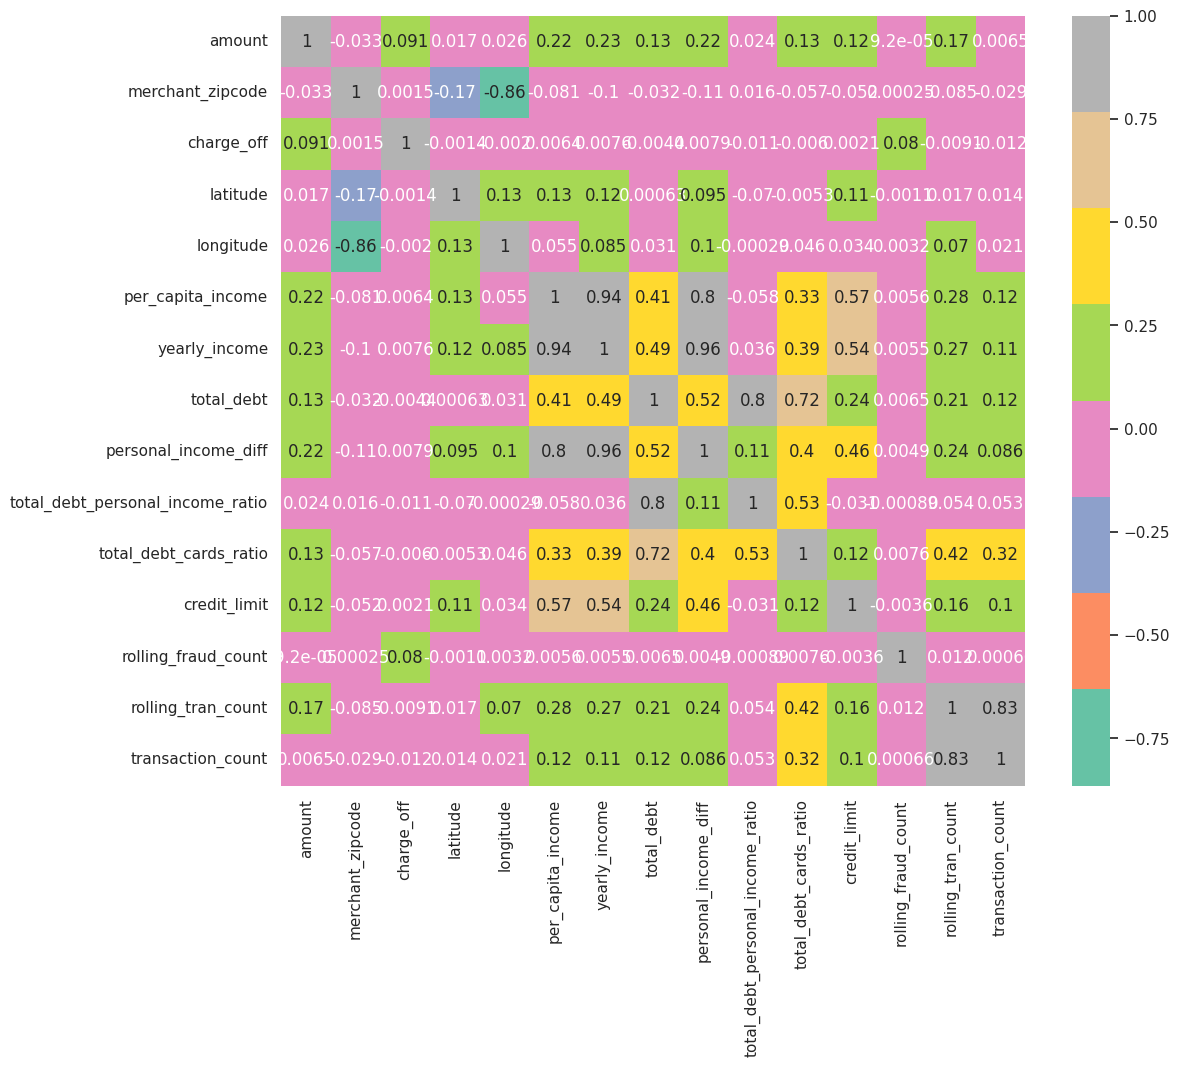

In [90]:
float_cols = df_errors.select_dtypes(include='float64').columns
plt.figure(figsize=[12,10])
sns.heatmap(df_errors[float_cols].corr(), annot=True, cmap='Set2')
plt.show();

Transaction_count and rolling_tran_count has positive correlation, rolling_fraud_count is not correlated in those varaibles. Per_capita_income, yearly_income, and personal income are highly correlated

In [91]:
#piv = pd.pivot_table(df_errors, columns=["user", "card", "time", "amount"], values =)
#piv

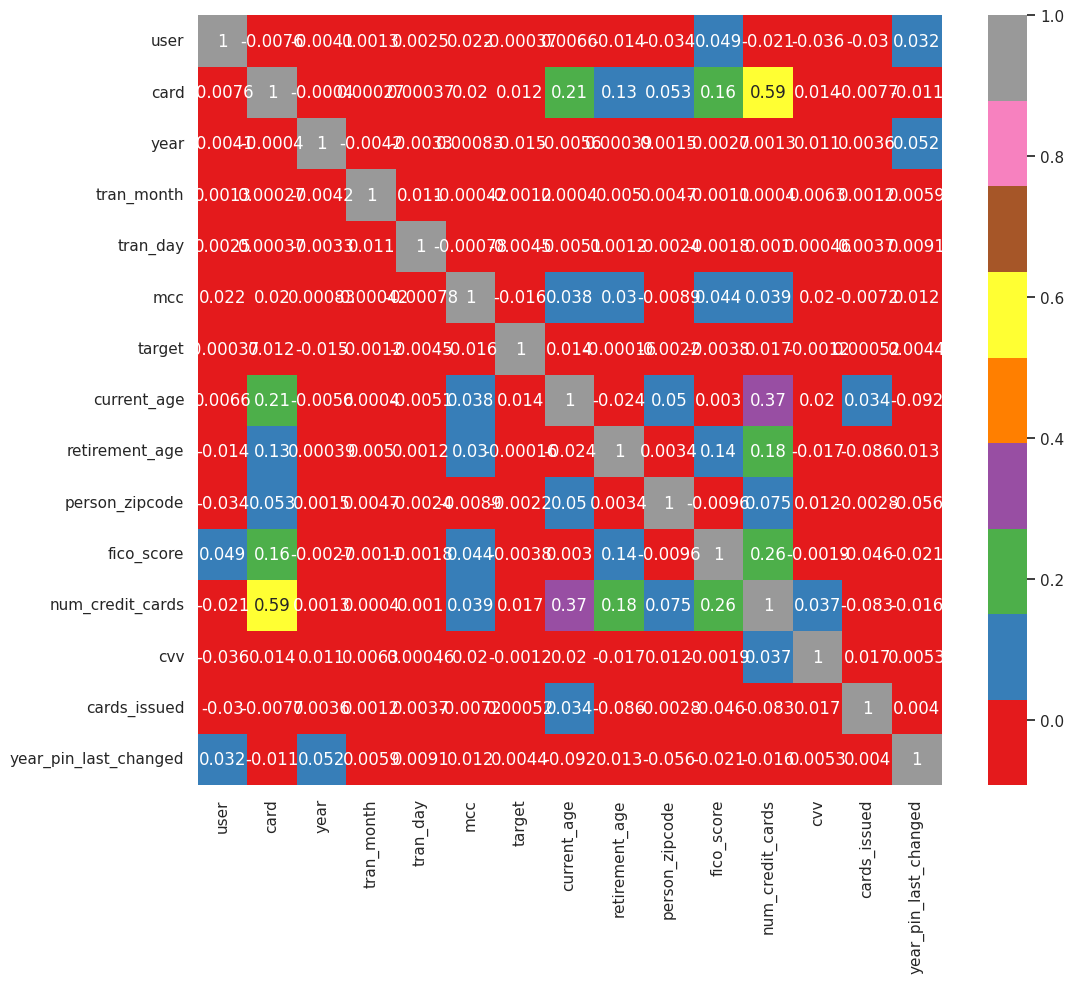

In [92]:
from matplotlib import figure
plt.figure(figsize=[12,10])
int_cols = df_errors.select_dtypes(include='int').columns
sns.heatmap(df_errors[int_cols].corr(), annot = True, cmap = 'Set1')
plt.show()

year_pin_last_changed and current_age are negativly correlated. card_issued,retirement_age, and num_credit_cards are negatively correlated as well. num_credits_cards and card are positively correlated. Can't say other variables are not cause for transaction fraud.

In [93]:
selected_columns = df_errors[['user', 'target', 'rolling_fraud_count','rolling_tran_count','amount','yearly_income','num_credit_cards','total_debt']]
selected_columns

,user,target,rolling_fraud_count,rolling_tran_count,amount,yearly_income,num_credit_cards,total_debt
14,0,0,0.0,718.78,106.81,59696.0,5,127613.0
43,0,0,0.0,401.27,48.91,59696.0,5,127613.0
77,0,0,0.0,776.95,121.85,59696.0,5,127613.0
86,0,0,0.0,666.24,78.86,59696.0,5,127613.0
157,0,0,0.0,1230.28,150.85,59696.0,5,127613.0
...,...,...,...,...,...,...,...,...
6876808,1999,0,0.0,8543.88,29.56,65909.0,2,181261.0
6876810,1999,0,0.0,8543.88,48.44,65909.0,2,181261.0
6877172,1999,0,0.0,8893.20,50.13,65909.0,2,181261.0
6877397,1999,0,0.0,7976.45,54.68,65909.0,2,181261.0


In [94]:
sel_col = pd.DataFrame(selected_columns)
sel_col

,user,target,rolling_fraud_count,rolling_tran_count,amount,yearly_income,num_credit_cards,total_debt
14,0,0,0.0,718.78,106.81,59696.0,5,127613.0
43,0,0,0.0,401.27,48.91,59696.0,5,127613.0
77,0,0,0.0,776.95,121.85,59696.0,5,127613.0
86,0,0,0.0,666.24,78.86,59696.0,5,127613.0
157,0,0,0.0,1230.28,150.85,59696.0,5,127613.0
...,...,...,...,...,...,...,...,...
6876808,1999,0,0.0,8543.88,29.56,65909.0,2,181261.0
6876810,1999,0,0.0,8543.88,48.44,65909.0,2,181261.0
6877172,1999,0,0.0,8893.20,50.13,65909.0,2,181261.0
6877397,1999,0,0.0,7976.45,54.68,65909.0,2,181261.0


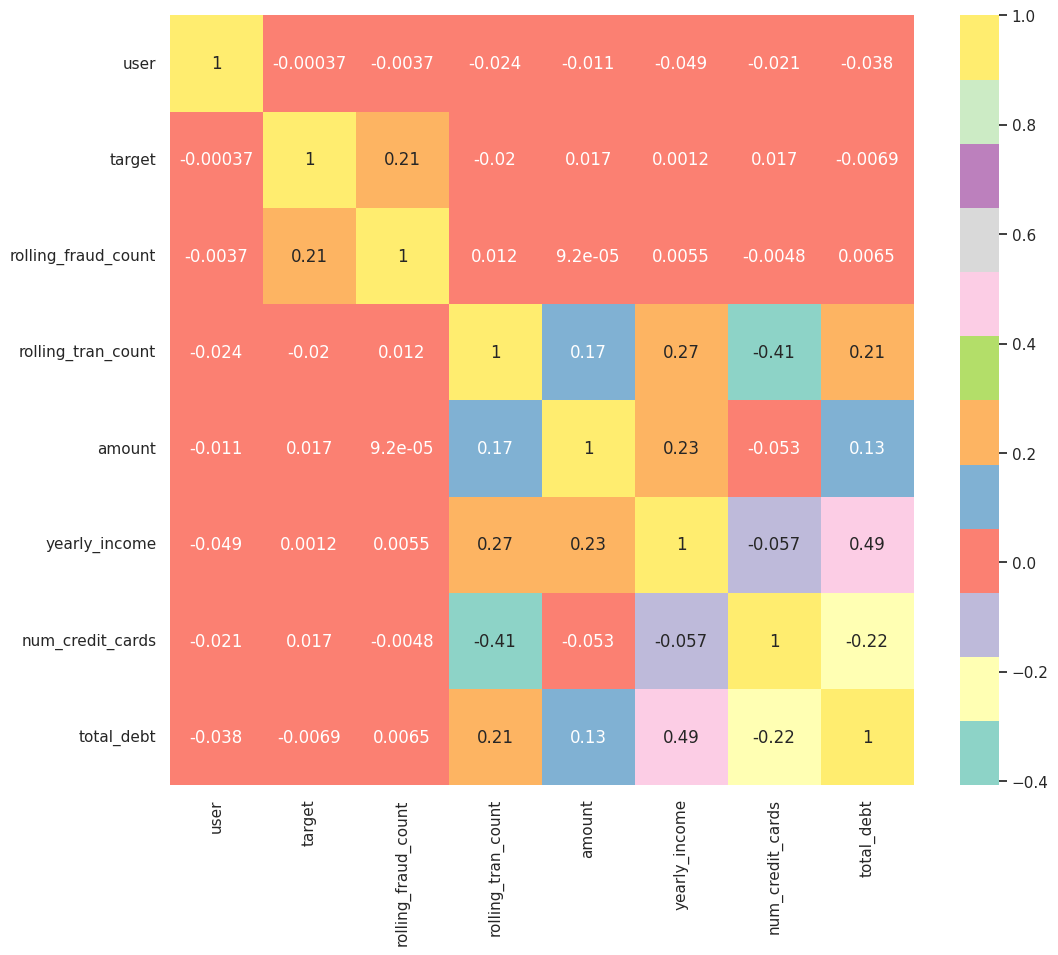

In [95]:
plt.figure(figsize = (12,10))
sns.heatmap(sel_col.corr(), annot = True, cmap ='Set3')
plt.show()

num_credit_cards, rolling_tran_count, and total_debt are negatively correleated.

What is the reasons of transaction fraud happened?
Rooling_fraud_count is not related to user, target, rooling_tran_count, amount, yearly_income and total_debt, slightly negative correlation between rolling_fraud_count and num_credit_cards. Time might be is the main reason for fraud, in particular time and day hackers are active. Lets do further investigation with time variable and fraud-count.

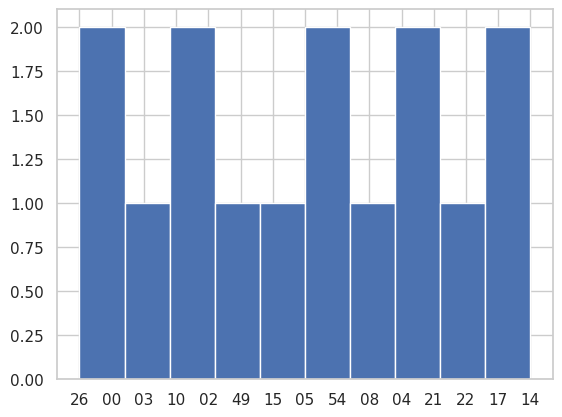

In [96]:
plt.hist(df_errors['minute'].iloc[:15])
#plt.xticks(rotation=45)
plt.show()

In [97]:
# Group by specified columns and calculate the mode of 'rolling_fraud_count'
mode_rolling_fraud_count = df_errors.groupby(['has_chip', 'card_type', 'card_brand', 'year', 'num_credit_cards'])['rolling_fraud_count'].agg(lambda x: x.mode().iat[0]).reset_index()
mode_rolling_fraud_count

,has_chip,card_type,card_brand,year,num_credit_cards,rolling_fraud_count
0,NO,Credit,Amex,2016,1,0.0
1,NO,Credit,Amex,2016,2,0.0
2,NO,Credit,Amex,2016,3,0.0
3,NO,Credit,Amex,2016,4,0.0
4,NO,Credit,Amex,2016,5,0.0
...,...,...,...,...,...,...
502,YES,Debit (Prepaid),Visa,2019,5,0.0
503,YES,Debit (Prepaid),Visa,2019,6,0.0
504,YES,Debit (Prepaid),Visa,2019,7,0.0
505,YES,Debit (Prepaid),Visa,2019,8,0.0


In [98]:
#Groupby specified columns and calculate average of rolling_fraud_count
card_gp = df_errors.groupby(['has_chip','card_type','card_brand', 'year', 'num_credit_cards','is_fraud?'])['rolling_fraud_count'].mean().sort_values(ascending=False).reset_index()
card_gp

,has_chip,card_type,card_brand,year,num_credit_cards,is_fraud?,rolling_fraud_count
0,YES,Credit,Mastercard,2019,1,Yes,12.0
1,YES,Credit,Mastercard,2018,5,Yes,11.0
2,YES,Credit,Discover,2019,5,Yes,10.0
3,YES,Credit,Amex,2018,1,Yes,8.0
4,YES,Debit (Prepaid),Mastercard,2018,6,Yes,8.0
...,...,...,...,...,...,...,...
623,NO,Debit (Prepaid),Mastercard,2018,2,No,0.0
624,NO,Debit (Prepaid),Mastercard,2018,1,No,0.0
625,NO,Debit (Prepaid),Mastercard,2017,7,No,0.0
626,NO,Debit (Prepaid),Mastercard,2017,6,No,0.0


The maximum average rolling fraud count is twelve for individuals who possess one credit cards with the card brand 'Mastercard,' card type 'credit,' and has chip in 2019. Additionally, individuals who have a number of credit cards between 1-9, possess debit cards with card brands 'Visa' or 'Mastercard,' and have no/yes chips, have a rolling fraud count of zero.

In [99]:
df_errors.drop(columns = ['time', 'merchant_city', 'merchant_state', 'merchant_zipcode'], inplace = True)


<ipython-input-99-75ea4eeba7d4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_errors.drop(columns = ['time', 'merchant_city', 'merchant_state', 'merchant_zipcode'], inplace = True)


In [100]:
df_errors.drop(columns = ['merchant_city_rome', 'person', 'retirement_age', 'address', 'person_city', 'person_state', 'person_zipcode', 'latitude', 'longitude'], inplace = True)

<ipython-input-100-8fd33afae97c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_errors.drop(columns = ['merchant_city_rome', 'person', 'retirement_age', 'address', 'person_city', 'person_state', 'person_zipcode', 'latitude', 'longitude'], inplace = True)


In [101]:
from sklearn.preprocessing import LabelEncoder
chip_encoder = LabelEncoder()
df_errors['use_chip'] = chip_encoder.fit_transform(df_errors['use_chip'])

<ipython-input-101-d97fd4983714>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_errors['use_chip'] = chip_encoder.fit_transform(df_errors['use_chip'])


In [102]:
mapping = dict(zip(chip_encoder.classes_,chip_encoder.transform(chip_encoder.classes_)))

# Now, you have a dictionary mapping encoded values to original labels
print("Mapping:", mapping)


Mapping: {'Chip Transaction': 0, 'Online Transaction': 1, 'Swipe Transaction': 2}


In [103]:
error_encoder = LabelEncoder()
df_errors['errors?'] = error_encoder.fit_transform(df_errors['errors?'])

<ipython-input-103-40f1d92b8f90>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_errors['errors?'] = error_encoder.fit_transform(df_errors['errors?'])


In [104]:
mapping2 = dict(zip(error_encoder.classes_, error_encoder.transform(error_encoder.classes_)))
print('Mapping:', mapping2)

Mapping: {'Bad CVV': 0, 'Bad CVV,Insufficient Balance': 1, 'Bad CVV,Technical Glitch': 2, 'Bad Card Number': 3, 'Bad Card Number,Bad CVV': 4, 'Bad Card Number,Bad Expiration': 5, 'Bad Card Number,Insufficient Balance': 6, 'Bad Card Number,Technical Glitch': 7, 'Bad Expiration': 8, 'Bad Expiration,Bad CVV': 9, 'Bad Expiration,Insufficient Balance': 10, 'Bad Expiration,Technical Glitch': 11, 'Bad PIN': 12, 'Bad PIN,Insufficient Balance': 13, 'Bad PIN,Technical Glitch': 14, 'Bad Zipcode': 15, 'Bad Zipcode,Insufficient Balance': 16, 'Bad Zipcode,Technical Glitch': 17, 'Insufficient Balance': 18, 'Insufficient Balance,Technical Glitch': 19, 'Technical Glitch': 20}


In [105]:
daytime_encoder = LabelEncoder()
df_errors['time_of_day'] = daytime_encoder.fit_transform(df_errors['time_of_day'])

<ipython-input-105-26ebb2238333>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_errors['time_of_day'] = daytime_encoder.fit_transform(df_errors['time_of_day'])


In [106]:
mapping3 = dict(zip(daytime_encoder.classes_, daytime_encoder.fit_transform(daytime_encoder.classes_)))
print('Mapping:', mapping3)

Mapping: {'day hours': 0, 'morning hours': 1, 'off hours': 2}


In [107]:
df_errors.drop(columns = 'is_fraud?', inplace = True)

<ipython-input-107-10f6320af388>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_errors.drop(columns = 'is_fraud?', inplace = True)


In [108]:
gender_encoder = LabelEncoder()
df_errors['gender'] = gender_encoder.fit_transform(df_errors['gender'])

<ipython-input-108-09a01891d27e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_errors['gender'] = gender_encoder.fit_transform(df_errors['gender'])


In [109]:
card_encoder = LabelEncoder()
df_errors['card_brand'] = card_encoder.fit_transform(df_errors['card_brand'])
mapping3 = dict(zip(card_encoder.classes_, card_encoder.fit_transform(card_encoder.classes_)))
print('Mapping:', mapping3)

Mapping: {'Amex': 0, 'Discover': 1, 'Mastercard': 2, 'Visa': 3}


<ipython-input-109-b40ba7be8674>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_errors['card_brand'] = card_encoder.fit_transform(df_errors['card_brand'])


In [110]:
print('Mapping:', mapping3)

Mapping: {'Amex': 0, 'Discover': 1, 'Mastercard': 2, 'Visa': 3}


In [111]:
cardtype_encoder = LabelEncoder()
df_errors['card_type'] = cardtype_encoder.fit_transform(df_errors['card_type'])

<ipython-input-111-c8f7d9395825>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_errors['card_type'] = cardtype_encoder.fit_transform(df_errors['card_type'])


In [112]:
mapping4 = dict(zip(cardtype_encoder.classes_, cardtype_encoder.fit_transform(cardtype_encoder.classes_)))
print('Mapping:', mapping4)

Mapping: {'Credit': 0, 'Debit': 1, 'Debit (Prepaid)': 2}


In [113]:
has_chip_encoder = LabelEncoder()
df_errors['has_chip'] = has_chip_encoder.fit_transform(df_errors['has_chip'])

<ipython-input-113-be1f3fe76c7e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_errors['has_chip'] = has_chip_encoder.fit_transform(df_errors['has_chip'])


In [114]:
mapping5 = dict(zip(has_chip_encoder.classes_, has_chip_encoder.fit_transform(has_chip_encoder.classes_)))
print('Mapping:', mapping5)

Mapping: {'NO': 0, 'YES': 1}


In [115]:
df_errors.drop(columns =[ 'card_on_dark_web', 'expires', 'acct_open_date'], inplace=True)

<ipython-input-115-d349ec655e2d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_errors.drop(columns =[ 'card_on_dark_web', 'expires', 'acct_open_date'], inplace=True)


In [116]:
df_errors.dropna(inplace = True)

<ipython-input-116-6e36c84fe8a0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_errors.dropna(inplace = True)


In [117]:
df_errors.head(1)

,user,card,year,tran_month,tran_day,amount,use_chip,mcc,errors?,minute,time_of_day,target,charge_off,current_age,gender,per_capita_income,yearly_income,total_debt,fico_score,num_credit_cards,personal_income_diff,total_debt_personal_income_ratio,total_debt_cards_ratio,card_brand,card_type,cvv,has_chip,cards_issued,credit_limit,year_pin_last_changed,rolling_fraud_count,rolling_tran_count,transaction_count
14,0,0,2016,1,24,106.81,2,5812,18,26,2,0,0.0,53,0,29278.0,59696.0,127613.0,787,5,30418.0,2.137714,25522.6,3,1,623,1,2,24295.0,2008,0.0,718.78,12.0


In [118]:
#Splitting the model in train and test, for this I will be using data set with transaction error, target will be label.
from sklearn.model_selection import train_test_split
x = df_errors.loc[:, df_errors.columns != 'target']
y = df_errors.loc[:, df_errors.columns == 'target']
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 50, test_size = 0.3, shuffle = True)

In [119]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((76258, 32), (32683, 32), (76258, 1), (32683, 1))

In [120]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train.values.ravel())
y_pred = log_reg.predict(x_test)
log_score = accuracy_score(y_test, y_pred)
conf_log = pd.DataFrame(confusion_matrix(y_test, y_pred))
print(conf_log)

       0  1
0  32597  0
1     86  0


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [121]:
print(conf_log)

       0  1
0  32597  0
1     86  0


In [122]:
log_score

0.9973686626074718

In [135]:
model = RandomForestClassifier(criterion='entropy')
model.fit(x_train, y_train.values.ravel() )
y_pred_prob = model.predict_proba(x_test)[:, 1]

In [136]:
y_pred_adjusted = (y_pred_prob > 0.3).astype(int)

In [137]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_adjusted)

# Calculate precision
precision = precision_score(y_test, y_pred_adjusted)

# Calculate recall
recall = recall_score(y_test, y_pred_adjusted)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.9999388061071505
Precision: 1.0
Recall: 0.9767441860465116


# **Summary of Model Performance in Credit Card Fraud Detection:**

Our model, trained on a credit card transaction dataset, demonstrates robust performance in identifying fraudulent transactions. The achieved metrics are as follows:

Accuracy: The model exhibits an exceptional accuracy of 99.99%, indicating its ability to make accurate predictions on the majority of transactions.

Precision: With a precision of 100%, the model effectively minimizes false positives. In other words, when it predicts a transaction as fraudulent, it is indeed a true positive.

Recall: The model achieves a recall of 97.67%, showcasing its capability to correctly identify a high percentage of actual fraudulent transactions. This is crucial for minimizing false negatives in fraud detection.

These results indicate a strong predictive capability of the model, particularly in identifying instances of credit card fraud.

In [138]:
!git clone https://github.com/Sinha123456/DS4.git

Cloning into 'DS4'...
remote: Enumerating objects: 15, done.
remote: Counting objects: 100% (15/15), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 15 (delta 2), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (15/15), 21.42 MiB | 19.48 MiB/s, done.
Resolving deltas: 100% (2/2), done.


# **Conclusion**
The financial dataset indicates that credit or debit accounts were opened starting in the year 1991, with pin last change starting in the year 2002. Given the dataset's global coverage, it is possible that credit card usage was not widespread in some parts of the world during earlier years. Surprisingly, the dataset reveals transactions starting from the year 2015, with reported fraud cases spanning from 2015 to 2019. Notably, there is no recorded data for fraud or no fraud in the year 2020.

The occurrence of fraud was notably high when the maximum error was 'Bad CVV and Insufficient Balance.' In contrast, no fraud incidents were reported when the maximum error was 'Bad Expiration and Technical Glitch.'

Debit Mastercard transactions experienced the highest rolling fraud count, while the minimum count was observed for Visa Debit (prepaid) and Discover credit card transactions.

A higher count of merchant code (MCC) and CVV did not have with fraud, and vice versa.

Transactions with amounts less than 50 and completed in less than 30 minutes typically showed no fraud, although some exceptional cases were noted. Additionally, if a transaction time exceeds the usual duration, it is advisable to halt the transaction, change your PIN frequently, as lower transaction amounts might necessarily prevent fraud.






Regenerate

